In [2]:
import warnings

import numpy as np
from numpy import array
import pandas as pd
from pandas import concat
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import ParameterGrid

pd.plotting.register_matplotlib_converters()

warnings.filterwarnings("ignore")

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
!python -m pip3 install --upgrade pip3
!pip3 install pmdarima
!pip3 install seaborn


/System/Library/Frameworks/Python.framework/Versions/2.7/Resources/Python.app/Contents/MacOS/Python: No module named pip3


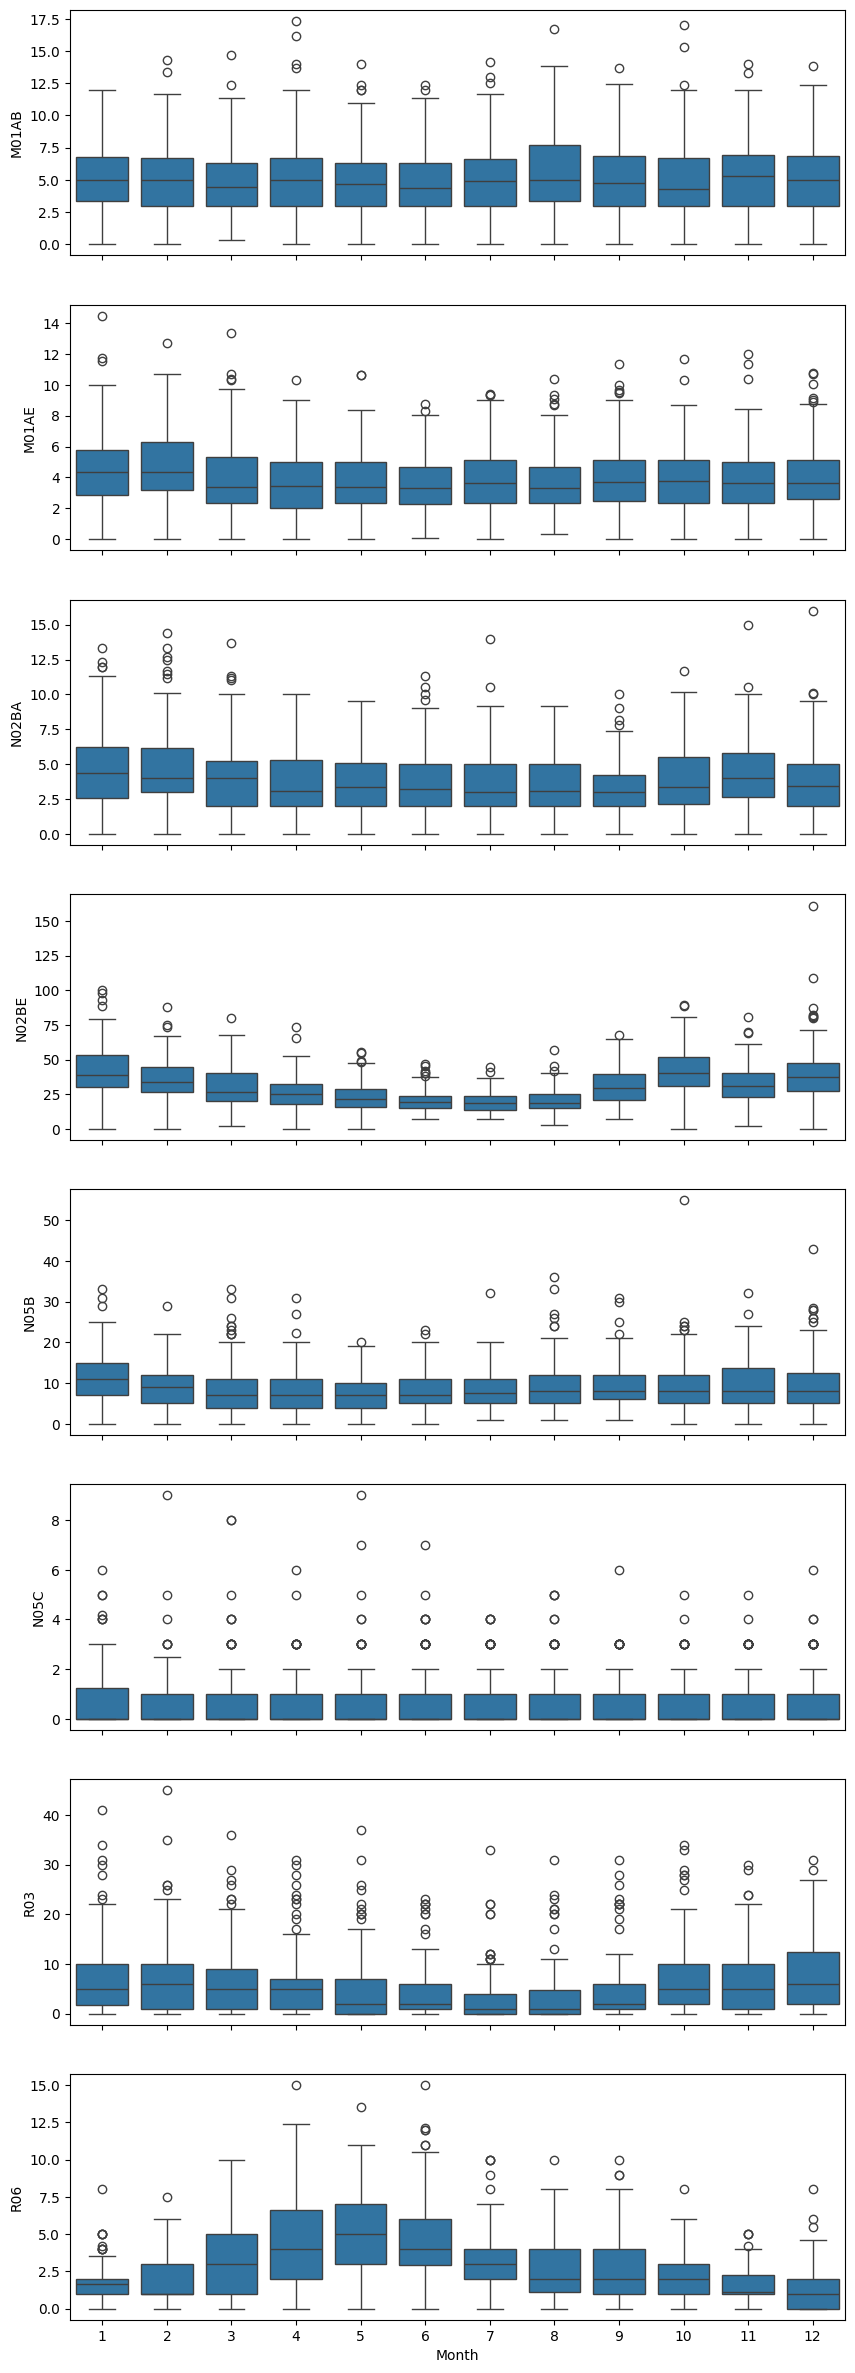

In [5]:
import seaborn as sns
dfatc_daily = pd.read_csv('/Users/csuftitan/Desktop/Forecast/salesdaily.csv')
fig, axes = plt.subplots(8, 1, figsize=(10, 30), sharex=True)
for name, ax in zip(['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06'], axes):
    sns.boxplot(data=dfatc_daily, x='Month', y=name, ax=ax)

In [50]:
# Read the data
dfatc_daily = pd.read_csv('/Users/csuftitan/Desktop/Forecast/salesdaily.csv')

# Calculate summary statistics
summary_stats = dfatc_daily.groupby('Month').agg({'M01AB': ['mean', 'median', 'std'],
                                                  'M01AE': ['mean', 'median', 'std'],
                                                  'N02BA': ['mean', 'median', 'std'],
                                                  'N02BE': ['mean', 'median', 'std'],
                                                  'N05B': ['mean', 'median', 'std'],
                                                  'N05C': ['mean', 'median', 'std'],
                                                  'R03': ['mean', 'median', 'std'],
                                                  'R06': ['mean', 'median', 'std']})

# Print the summary statistics
print(summary_stats)

          M01AB                      M01AE                       N02BA         \
           mean median       std      mean  median       std      mean median   
Month                                                                           
1      5.022336  5.000  2.623762  4.367158  4.3400  2.477023  4.636329  4.400   
2      4.999527  5.000  2.654105  4.660450  4.3200  2.298558  4.679024  4.050   
3      4.912097  4.420  2.541130  3.891731  3.3665  2.281740  3.993844  4.000   
4      5.117944  5.000  2.972369  3.590106  3.4225  2.112071  3.711944  3.100   
5      4.846183  4.670  2.565759  3.649548  3.3515  1.988882  3.715806  3.400   
6      4.714778  4.340  2.661194  3.567889  3.3450  1.791324  3.753944  3.250   
7      5.207921  4.915  2.791277  3.774919  3.6700  2.077618  3.483333  3.000   
8      5.428333  5.000  2.876256  3.624366  3.3450  1.929477  3.477151  3.075   
9      5.004889  4.755  2.652048  3.969856  3.6865  2.018900  3.374167  3.000   
10     4.972301  4.330  2.87

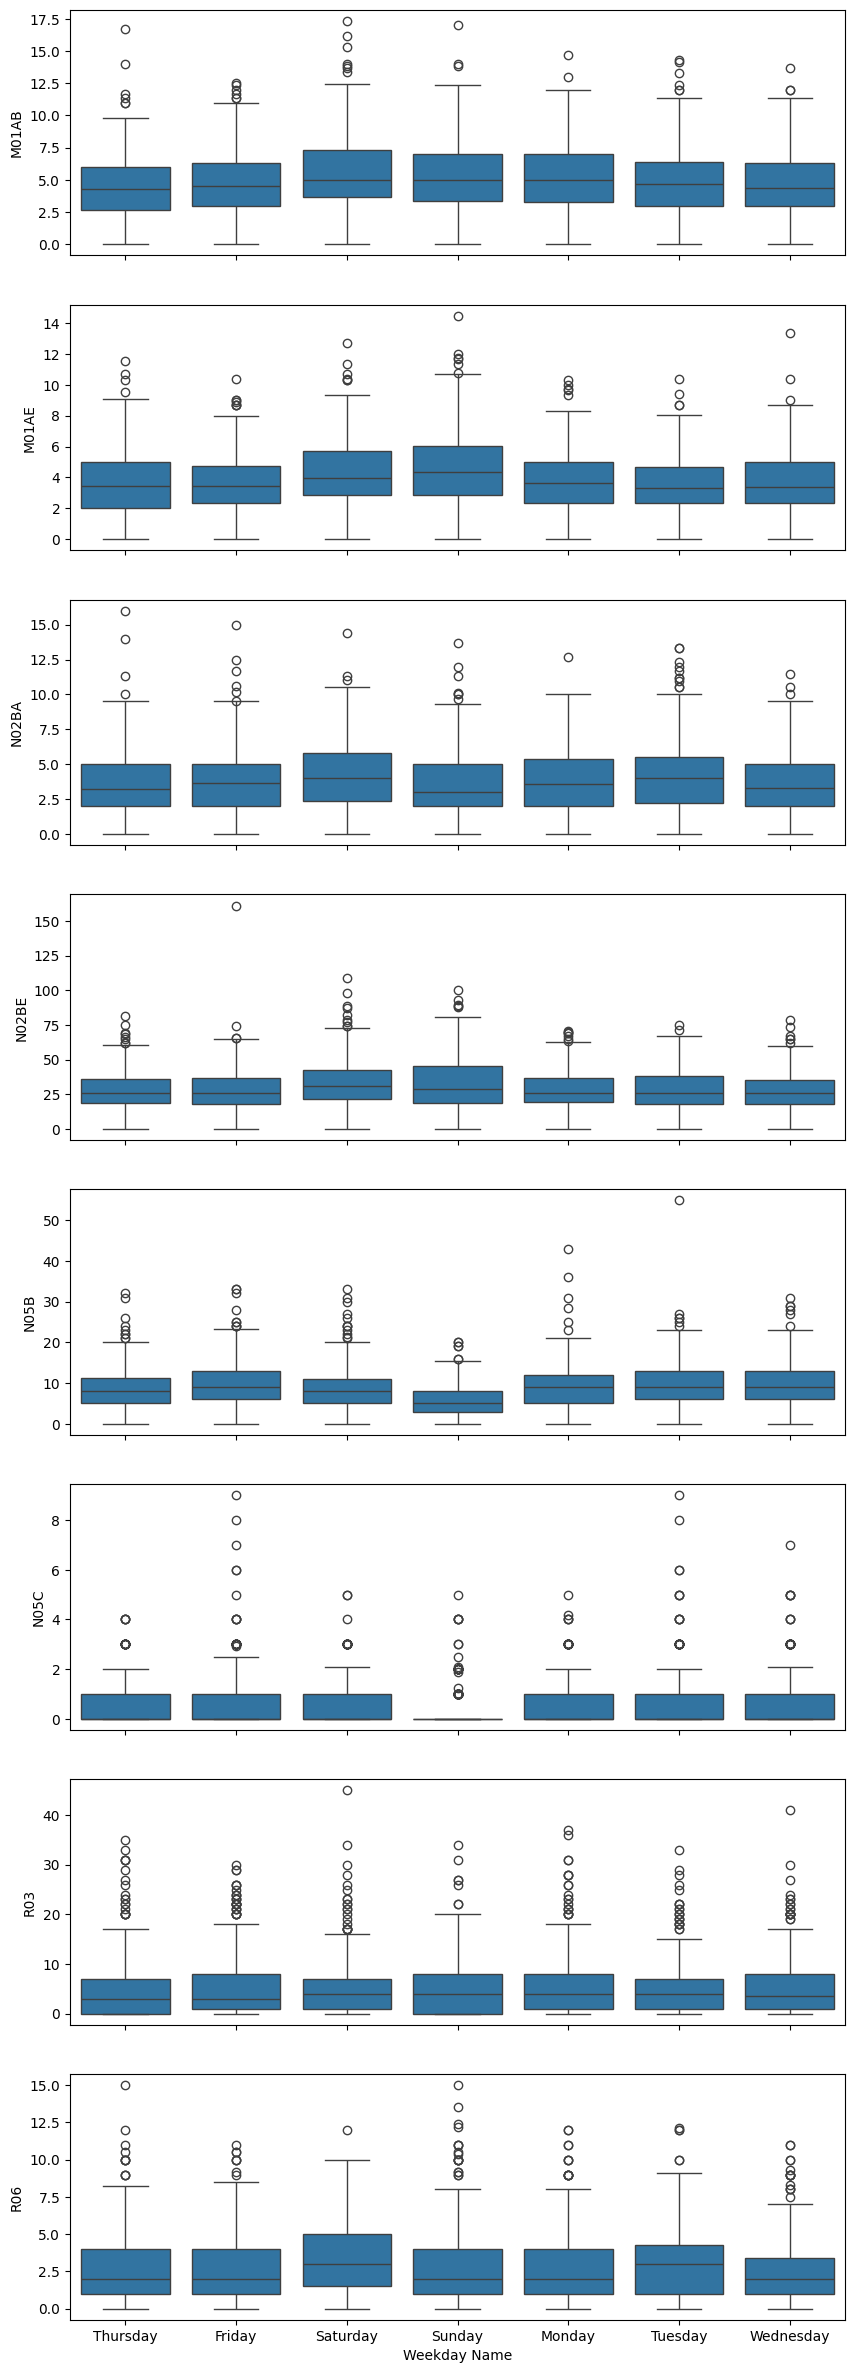

In [6]:
fig, axes = plt.subplots(8, 1, figsize=(10, 30), sharex=True)
for name, ax in zip(['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06'], axes):
    sns.boxplot(data=dfatc_daily, x='Weekday Name', y=name, ax=ax)

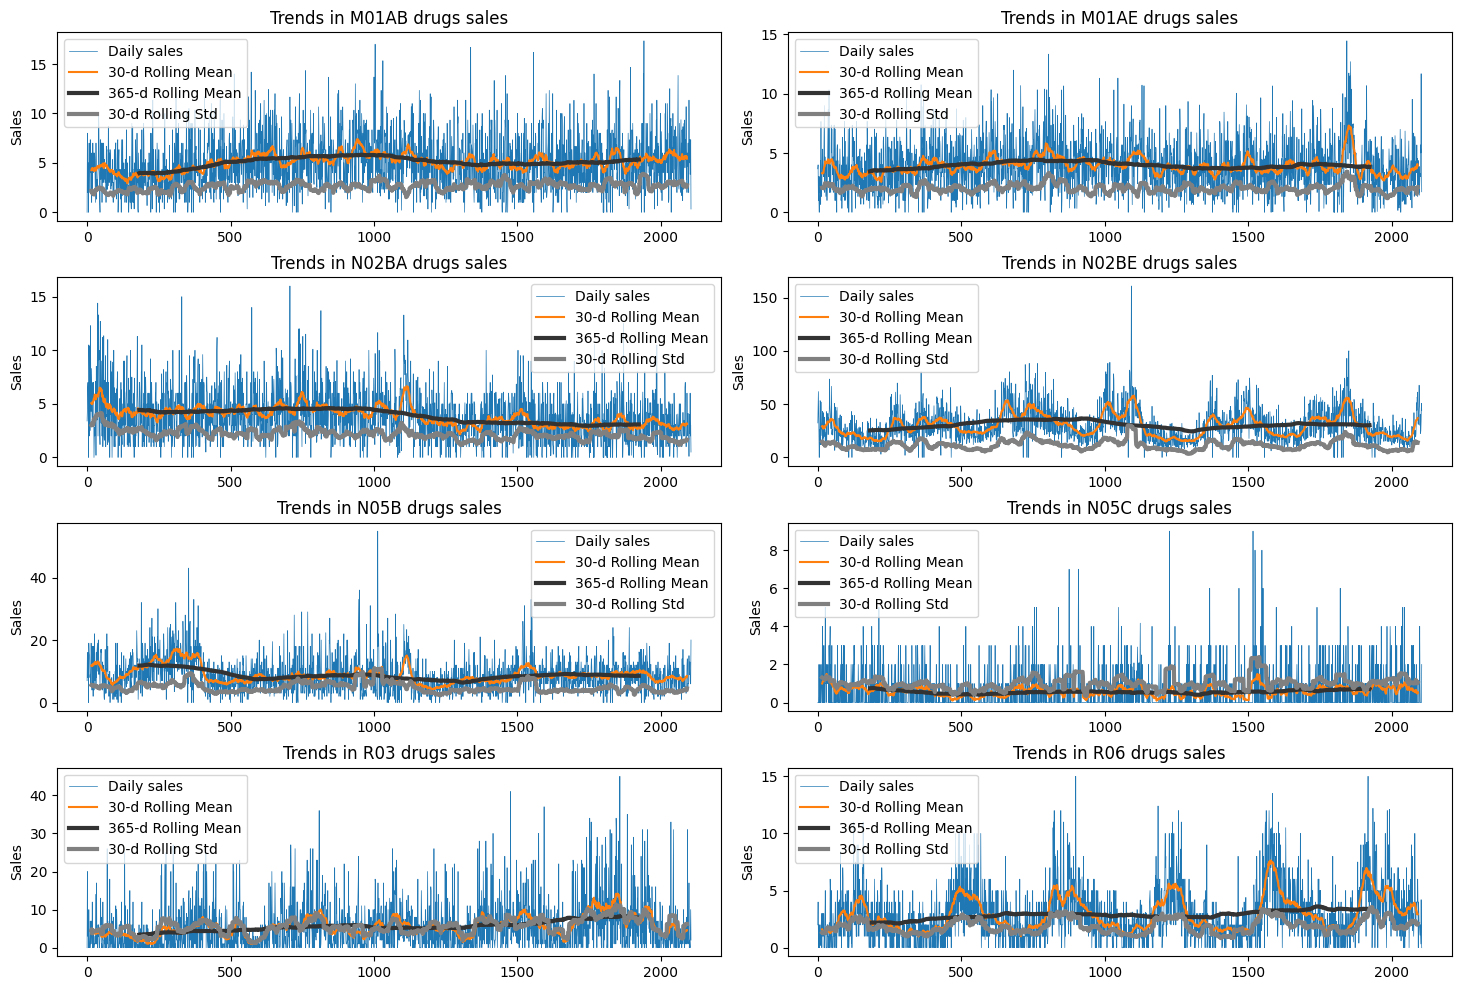

In [7]:
dfatc_daily=pd.read_csv('/Users/csuftitan/Desktop/Forecast/salesdaily.csv')
cols_plot = ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']
dfatc_365d = dfatc_daily[cols_plot].rolling(window=365, center=True).mean()
dfatc_30d = dfatc_daily[cols_plot].rolling(30, center=True).mean()
dfatc_std = dfatc_daily[cols_plot].rolling(30, center=True).std()
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

for x in cols_plot:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    ax[rowindex,colindex].plot(dfatc_daily.loc[:,x], linewidth=0.5, label='Daily sales')
    ax[rowindex,colindex].plot(dfatc_30d.loc[:,x], label='30-d Rolling Mean')
    ax[rowindex,colindex].plot(dfatc_365d.loc[:,x], color='0.2', linewidth=3, label='365-d Rolling Mean')
    ax[rowindex,colindex].plot(dfatc_std.loc[:,x], color='0.5', linewidth=3, label='30-d Rolling Std')
    ax[rowindex,colindex].set_ylabel('Sales')
    ax[rowindex,colindex].legend()
    ax[rowindex,colindex].set_title('Trends in '+x+' drugs sales');
    subplotindex=subplotindex+1
plt.show()

In [52]:
print(summary_stats)

          M01AB                      M01AE                       N02BA         \
           mean median       std      mean  median       std      mean median   
Month                                                                           
1      5.022336  5.000  2.623762  4.367158  4.3400  2.477023  4.636329  4.400   
2      4.999527  5.000  2.654105  4.660450  4.3200  2.298558  4.679024  4.050   
3      4.912097  4.420  2.541130  3.891731  3.3665  2.281740  3.993844  4.000   
4      5.117944  5.000  2.972369  3.590106  3.4225  2.112071  3.711944  3.100   
5      4.846183  4.670  2.565759  3.649548  3.3515  1.988882  3.715806  3.400   
6      4.714778  4.340  2.661194  3.567889  3.3450  1.791324  3.753944  3.250   
7      5.207921  4.915  2.791277  3.774919  3.6700  2.077618  3.483333  3.000   
8      5.428333  5.000  2.876256  3.624366  3.3450  1.929477  3.477151  3.075   
9      5.004889  4.755  2.652048  3.969856  3.6865  2.018900  3.374167  3.000   
10     4.972301  4.330  2.87

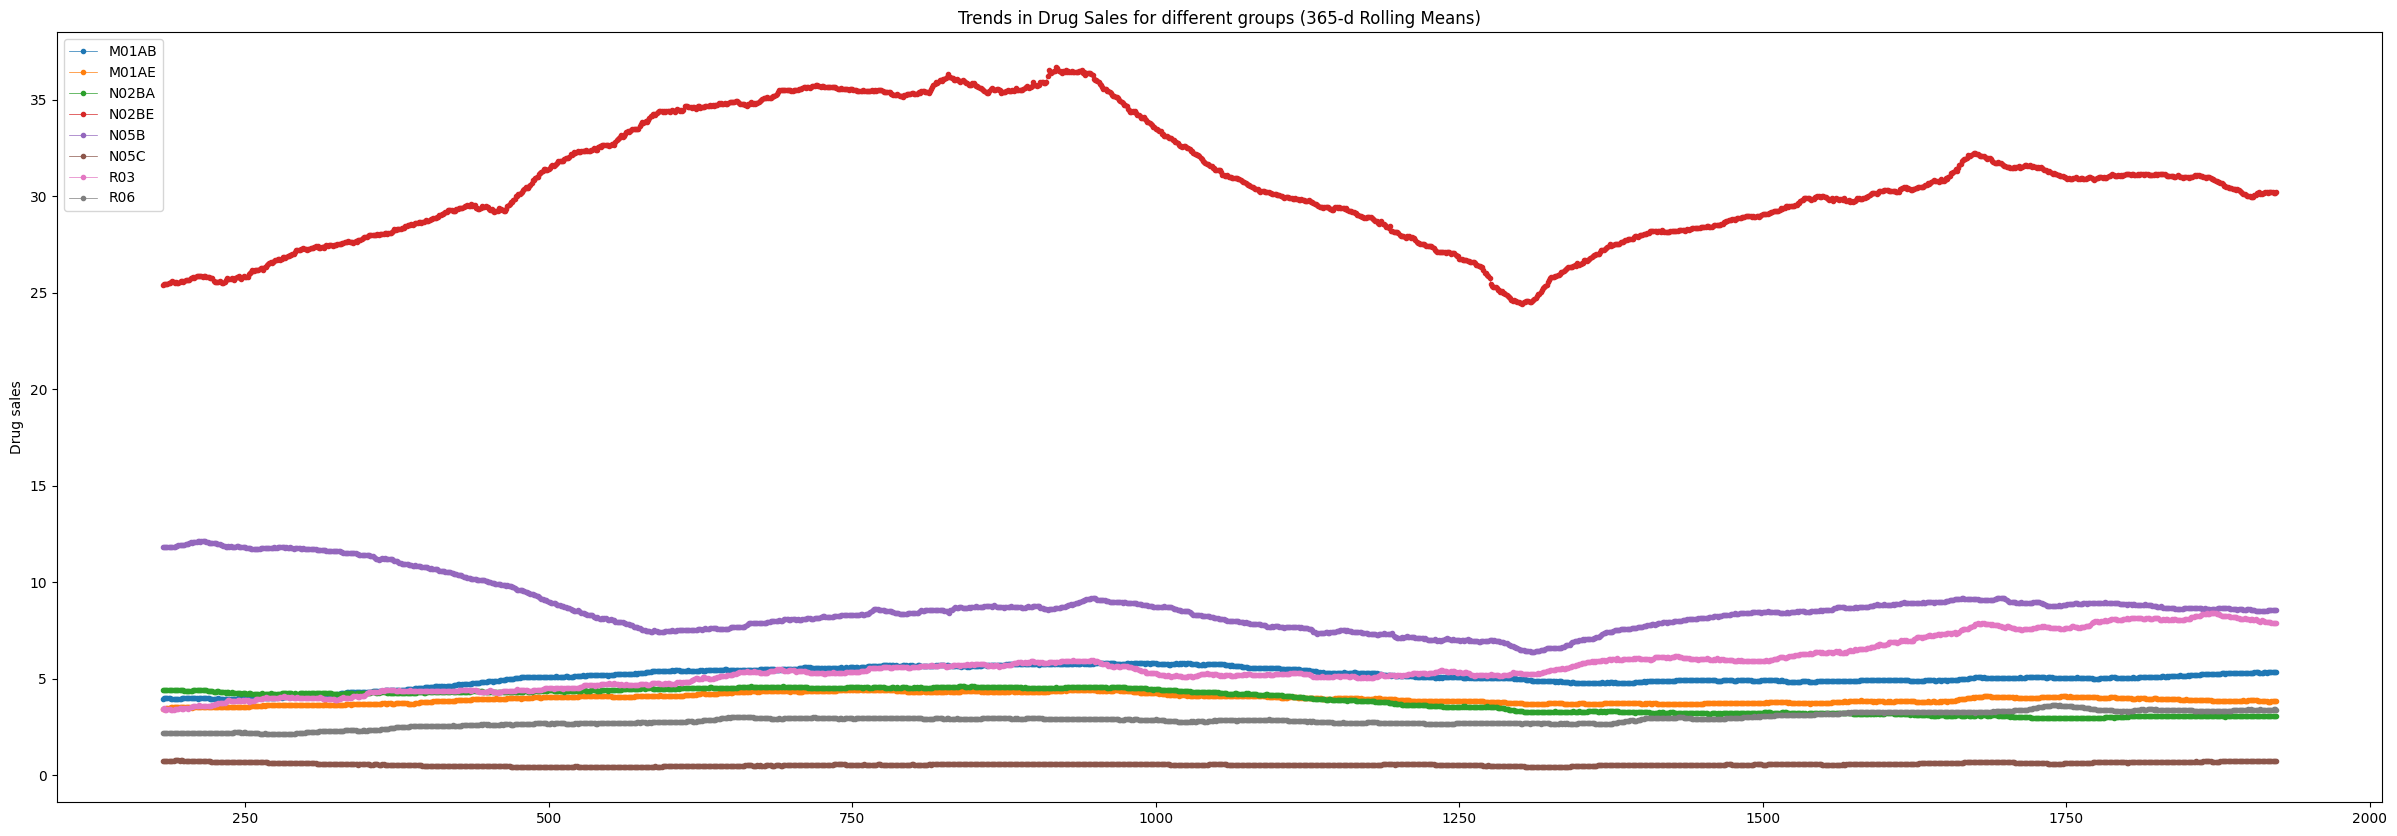

In [8]:
fig, ax = plt.subplots(figsize=(30, 10))
for nm in cols_plot:
    ax.plot(dfatc_365d[nm], label=nm, marker='.', linestyle='-', linewidth=0.5)
    ax.legend()
    ax.set_ylabel('Drug sales')
    ax.set_title('Trends in Drug Sales for different groups (365-d Rolling Means)');

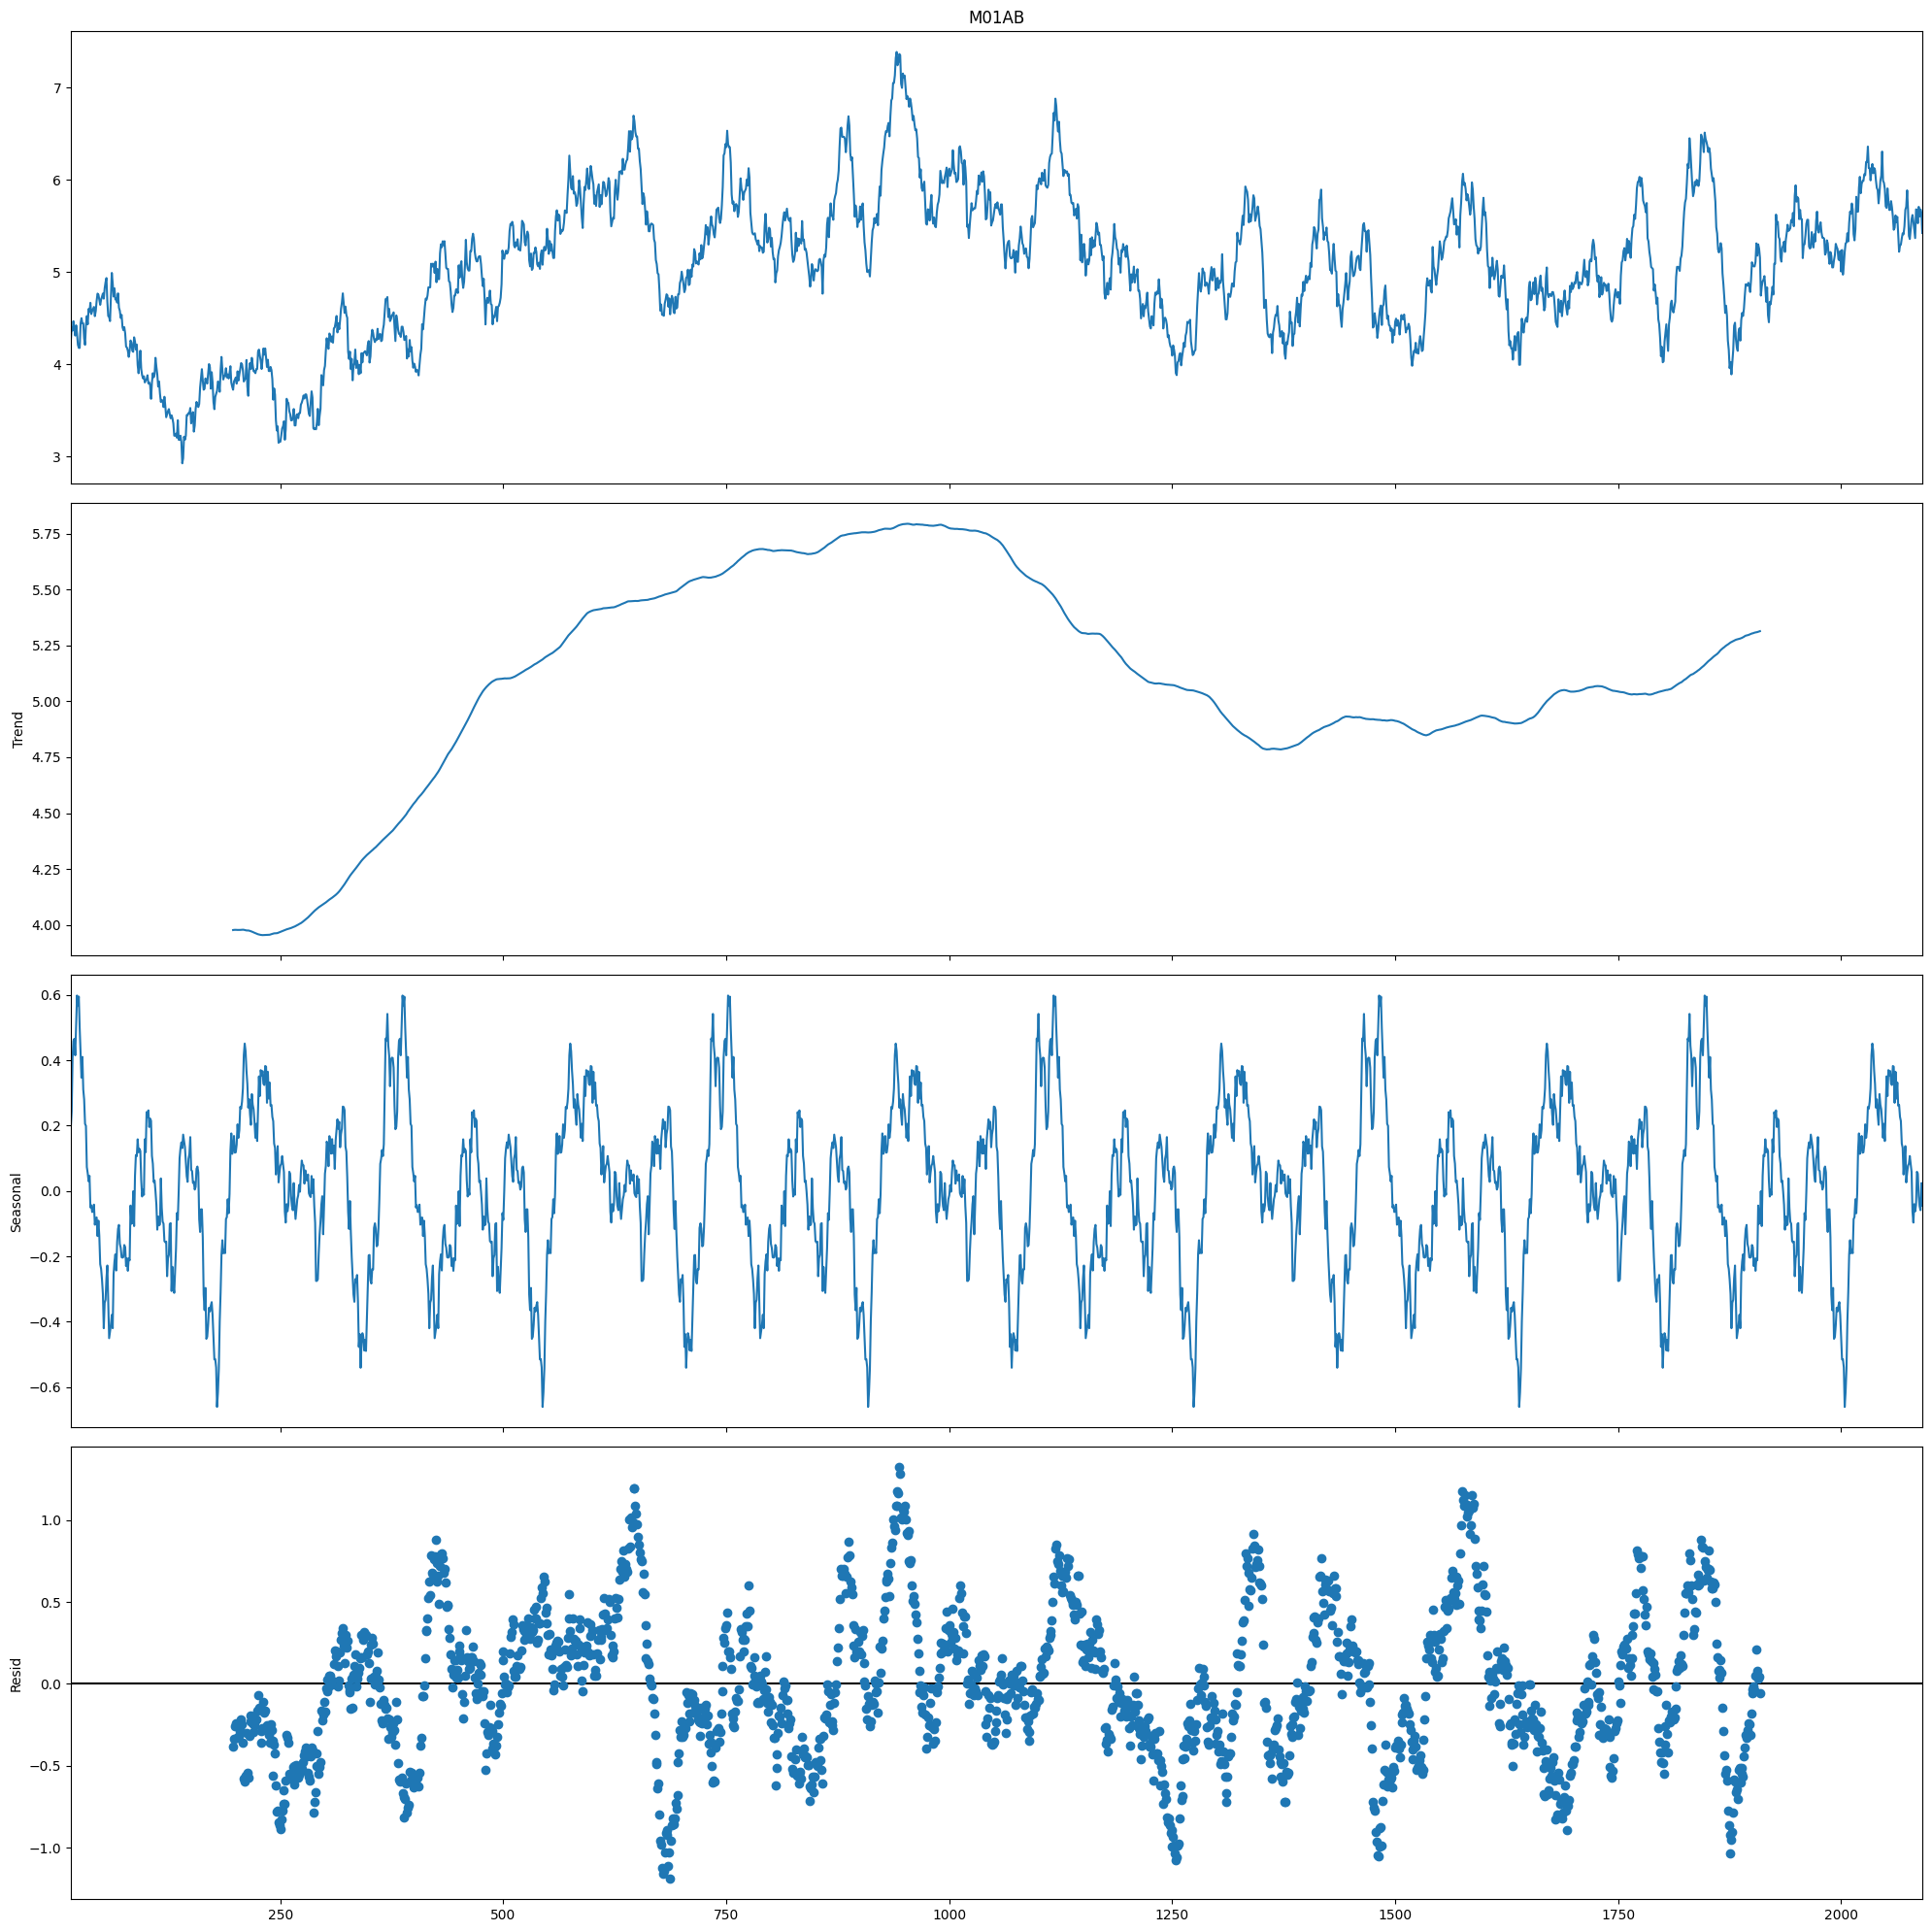

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(dfatc_daily['M01AB'].rolling(30, center=True).mean().dropna(), period=365, filt=None)
plt.rcParams["figure.figsize"] = (20, 20)
result.plot()
plt.show()

In [10]:
df = pd.read_csv('/Users/csuftitan/Desktop/Forecast/salesweekly.csv')
for x in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    result = seasonal_decompose(df[x], period=52, model='additive')
    dfs = pd.concat([result.trend, result.seasonal, result.resid, result.observed], axis=1)
    dfs.columns = ['trend', 'seasonal', 'residuals', 'observed']
    dfs=dfs.dropna()
    res=dfs['residuals'].values
    obs=dfs['observed'].values
    resmean=np.mean(np.abs(res))
    obsmean=np.mean(np.abs(obs))
    perc=resmean*100/obsmean
    print(x+' RESMEAN:'+str(resmean)+', OBSMEAN:'+str(obsmean)+', PERC:'+str(perc)+'%')

M01AB RESMEAN:5.26715996284115, OBSMEAN:35.59490833332001, PERC:14.797509558159527%
M01AE RESMEAN:4.319542609675869, OBSMEAN:28.00801458336, PERC:15.422523423856601%
N02BA RESMEAN:3.9228389592521657, OBSMEAN:27.083016, PERC:14.484498178682042%
N02BE RESMEAN:29.534357236963668, OBSMEAN:217.6597028336, PERC:13.569051529737028%
N05B RESMEAN:12.94840305932125, OBSMEAN:61.96614999972, PERC:20.895929566997072%
N05C RESMEAN:2.0384606385595405, OBSMEAN:3.871833333332, PERC:52.648460382081936%
R03 RESMEAN:11.722244335544508, OBSMEAN:40.06845833336, PERC:29.25554119906046%
R06 RESMEAN:4.278758416393868, OBSMEAN:19.744589999960002, PERC:21.67053565762842%


In [11]:
df=pd.read_csv('/Users/csuftitan/Desktop/Forecast/salesweekly.csv')
from statsmodels.tsa.stattools import adfuller

for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
    dftest = adfuller(df[x], regression='ct', autolag='AIC')
    print("ADF test for "+x)
    print("-----------------------------")
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

ADF test for M01AB
-----------------------------
Test statistic = -3.700
P-value = 0.022
Critical values :
	1%: -3.9897903649837616 - The data is not stationary with 99% confidence
	5%: -3.425478311521626 - The data is  stationary with 95% confidence
	10%: -3.1358607194990724 - The data is  stationary with 90% confidence
ADF test for M01AE
-----------------------------
Test statistic = -8.717
P-value = 0.000
Critical values :
	1%: -3.98926783537037 - The data is  stationary with 99% confidence
	5%: -3.425226747185185 - The data is  stationary with 95% confidence
	10%: -3.1357131066666666 - The data is  stationary with 90% confidence
ADF test for N02BA
-----------------------------
Test statistic = -2.670
P-value = 0.249
Critical values :
	1%: -3.990441532957606 - The data is not stationary with 99% confidence
	5%: -3.425791763669738 - The data is not stationary with 95% confidence
	10%: -3.1360446341572343 - The data is not stationary with 90% confidence
ADF test for N02BE
------------

In [12]:
from statsmodels.tsa.stattools import kpss
warnings.filterwarnings("ignore")
df=pd.read_csv('/Users/csuftitan/Desktop/Forecast/salesweekly.csv')
def handle_zero_negative_values(df, column):
    df[column] = df[column].replace(0, np.nan)
    df[column] = df[column].replace(np.nan, df[column].mean())
    df[column] = df[column].replace(np.inf, df[column].mean())
    df[column] = df[column].replace(-np.inf, df[column].mean())
    return df

for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
    df = handle_zero_negative_values(df, x)
    print(" > Is "+x+" data stationary ?")
    dftest = kpss(np.log(df[x]), 'ct')
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[3].items():
        print("\t{}: {}".format(k, v))

 > Is M01AB data stationary ?
Test statistic = 0.469
P-value = 0.010
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is M01AE data stationary ?
Test statistic = 0.347
P-value = 0.010
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is N02BA data stationary ?
Test statistic = 0.233
P-value = 0.010
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is N02BE data stationary ?
Test statistic = 0.095
P-value = 0.100
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is N05B data stationary ?
Test statistic = 0.197
P-value = 0.017
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is N05C data stationary ?
Test statistic = 0.153
P-value = 0.044
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is R03 data stationary ?
Test statistic = 0.055
P-value = 0.100
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is R06 data stationary ?
Test statistic = 0.032
P-value = 0.100

In [13]:
df = pd.read_csv('/Users/csuftitan/Desktop/Forecast/salesweekly.csv')
def ApEn(U, m, r):
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])
    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))
    N = len(U)
    return abs(_phi(m+1) - _phi(m))

for x in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    print(x + ': ' + str(ApEn(df[x].values, m=2, r=0.2*np.std(df[x].values))))

M01AB: 1.141130089570642
M01AE: 1.166363924596575
N02BA: 1.1370638730125302
N02BE: 1.058024809082593
N05B: 1.074437415034502
N05C: 1.0361887401424648
R03: 1.1847216239035152
R06: 1.031759595747876


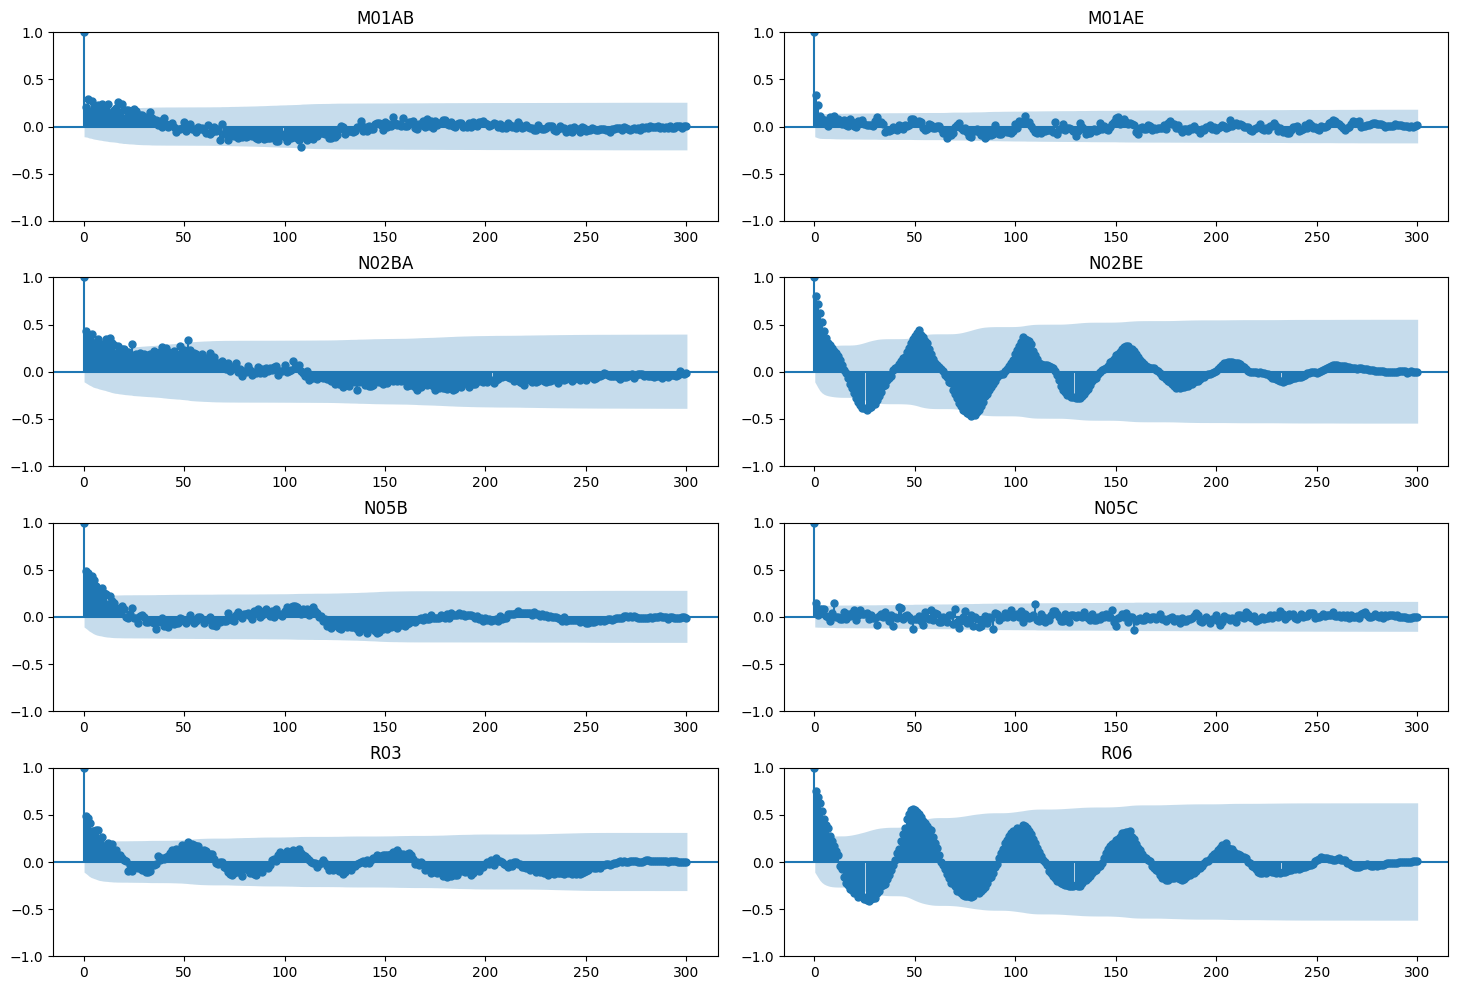

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
df = pd.read_csv('/Users/csuftitan/Desktop/Forecast/salesweekly.csv')
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
with plt.rc_context():
    plt.rc("figure", figsize=(18,12))
    for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
        rowindex=math.floor(subplotindex/numcols)
        colindex=subplotindex-(rowindex*numcols)
        plot_acf(df[x], lags=300, title=x, ax=ax[rowindex,colindex])
        subplotindex=subplotindex+1

In [58]:
from statsmodels.tsa.stattools import pacf, acf
for x in ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']:
    pacf_values = pacf(df[x], nlags=100)
    acf_values = acf(df[x], nlags=100)
    
    print(f"Partial Autocorrelation (PACF) for {x}:")
    print(pacf_values)
    
    print(f"Autocorrelation (ACF) for {x}:")
    print(acf_values)

Partial Autocorrelation (PACF) for M01AB:
[ 1.00000000e+00  2.06508024e-01  2.57859772e-01  8.22021579e-02
  1.82160336e-01  1.14581192e-01  5.27228130e-02  1.12365204e-01
  2.62419036e-02  1.07922196e-01  6.02096158e-02  2.22527344e-02
  1.17164962e-01 -1.61666746e-02 -2.81298178e-02  6.77781456e-02
  4.99488568e-02  1.47785310e-01  2.09806532e-03  8.14745529e-02
 -8.11768277e-02 -1.16033059e-02  6.99533897e-02 -7.64355401e-02
 -1.43644638e-02  1.05742325e-01  2.71607980e-03 -3.21713297e-02
 -2.21734464e-02 -1.85176974e-02 -8.72706675e-02 -2.37603698e-02
  6.28690476e-04  6.79983292e-02 -4.82879271e-02 -5.72668548e-02
 -3.11320688e-02 -1.10174412e-01 -2.96127883e-02 -5.10193973e-02
  4.87402086e-02 -1.84730423e-02 -1.05148345e-01 -2.75000381e-02
 -1.48063422e-02 -6.35759390e-02 -7.38024117e-02 -4.12059553e-02
 -1.51001359e-02  1.69041553e-02  4.36678798e-02 -5.21178890e-02
  1.52372134e-02  1.06748782e-01 -5.36655436e-03 -1.11663634e-02
 -6.57590817e-03  1.50828560e-02  4.37029555e-02

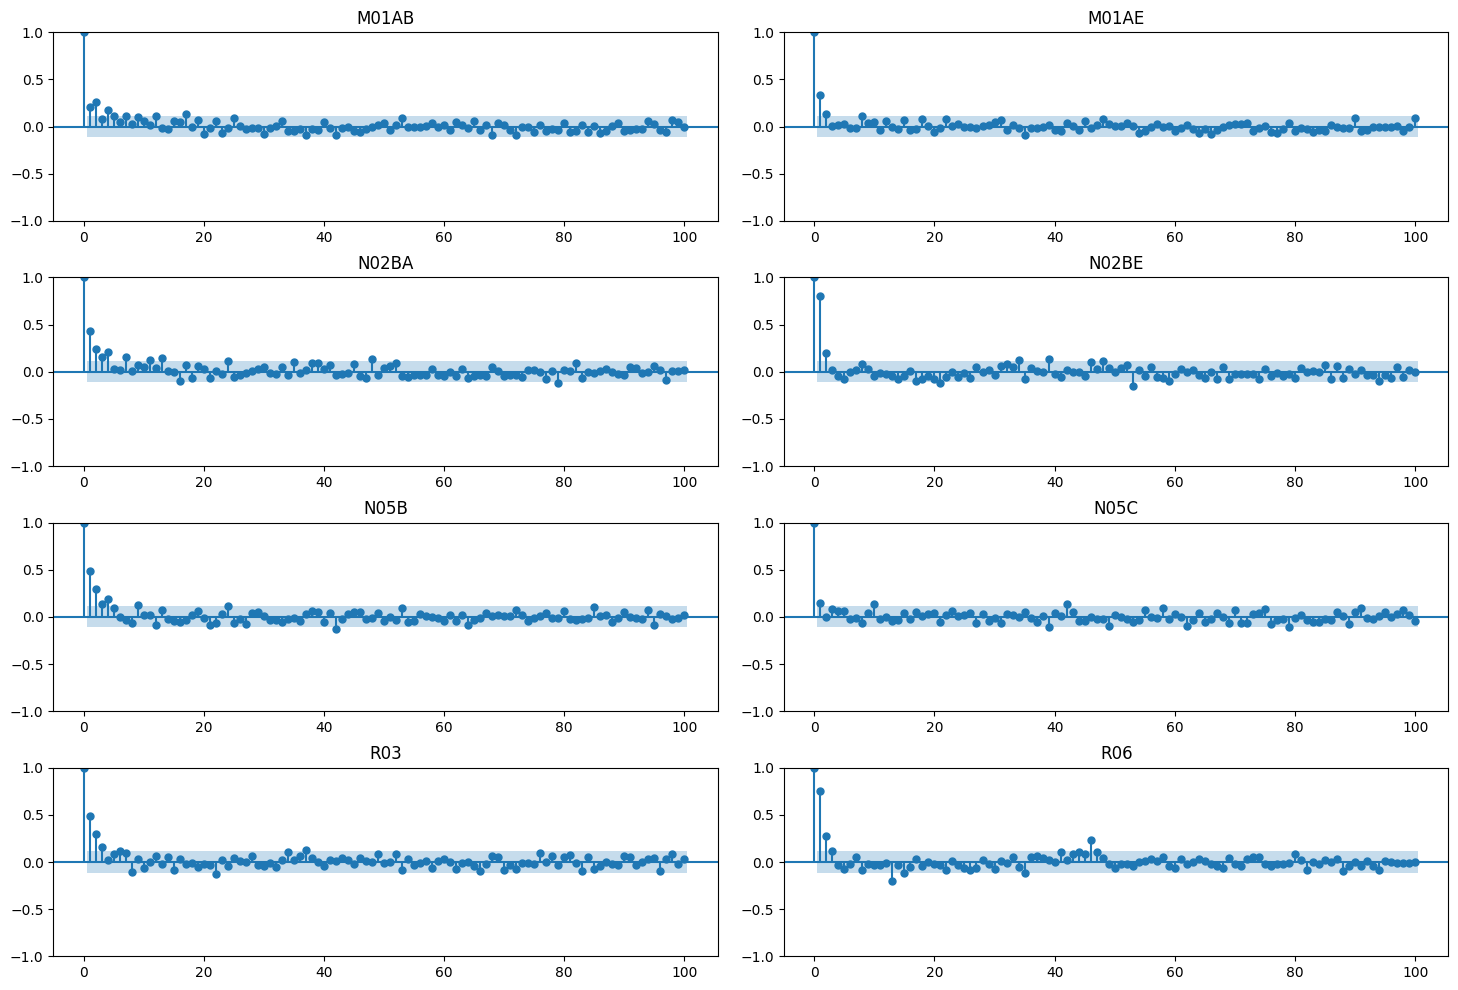

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
df = pd.read_csv('/Users/csuftitan/Desktop/Forecast/salesweekly.csv')
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
        rowindex=math.floor(subplotindex/numcols)
        colindex=subplotindex-(rowindex*numcols)
        plot_pacf(df[x], lags=100, title=x, ax=ax[rowindex,colindex])
        subplotindex=subplotindex+1

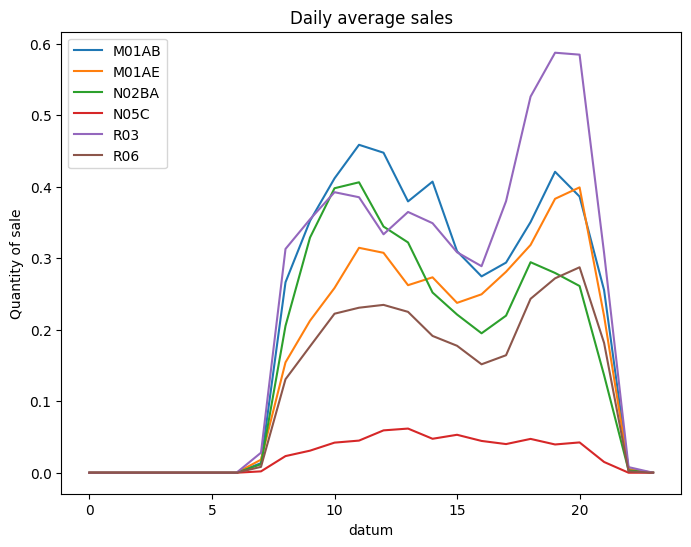

In [16]:
dfatch=pd.read_csv('/Users/csuftitan/Desktop/Forecast/saleshourly.csv')
dfatch['datum']= pd.to_datetime(dfatch['datum'])

grp1=dfatch.groupby(dfatch.datum.dt.hour)['M01AB'].mean()
grp2=dfatch.groupby(dfatch.datum.dt.hour)['M01AE'].mean()
grp3=dfatch.groupby(dfatch.datum.dt.hour)['N02BA'].mean()
grp6=dfatch.groupby(dfatch.datum.dt.hour)['N05C'].mean()
grp7=dfatch.groupby(dfatch.datum.dt.hour)['R03'].mean()
grp8=dfatch.groupby(dfatch.datum.dt.hour)['R06'].mean()

plt.title('Daily average sales')
plt.xlabel('Time of day')
plt.ylabel('Quantity of sale')

grp1.plot(figsize=(8,6))
grp2.plot(figsize=(8,6))
grp3.plot(figsize=(8,6))
grp6.plot(figsize=(8,6))
grp7.plot(figsize=(8,6))
grp8.plot(figsize=(8,6))

plt.legend(['M01AB', 'M01AE', 'N02BA', 'N05C', 'R03', 'R06'], loc='upper left')

plt.show()

In [60]:
# Group by hour and calculate mean sales for each category
grp1_mean = dfatch.groupby(dfatch.datum.dt.hour)['M01AB'].mean()
grp2_mean = dfatch.groupby(dfatch.datum.dt.hour)['M01AE'].mean()
grp3_mean = dfatch.groupby(dfatch.datum.dt.hour)['N02BA'].mean()
grp6_mean = dfatch.groupby(dfatch.datum.dt.hour)['N05C'].mean()
grp7_mean = dfatch.groupby(dfatch.datum.dt.hour)['R03'].mean()
grp8_mean = dfatch.groupby(dfatch.datum.dt.hour)['R06'].mean()

# Print out the mean sales for each category
print("Mean Sales for each category by hour:")
print("Hour\tM01AB\tM01AE\tN02BA\tN05C\tR03\tR06")
for hour in range(24):
    print(f"{hour}\t{grp1_mean.get(hour, 0):.2f}\t{grp2_mean.get(hour, 0):.2f}\t{grp3_mean.get(hour, 0):.2f}\t{grp6_mean.get(hour, 0):.2f}\t{grp7_mean.get(hour, 0):.2f}\t{grp8_mean.get(hour, 0):.2f}")

Mean Sales for each category by hour:
Hour	M01AB	M01AE	N02BA	N05C	R03	R06
0	0.00	0.00	0.00	0.00	0.00	0.00
1	0.00	0.00	0.00	0.00	0.00	0.00
2	0.00	0.00	0.00	0.00	0.00	0.00
3	0.00	0.00	0.00	0.00	0.00	0.00
4	0.00	0.00	0.00	0.00	0.00	0.00
5	0.00	0.00	0.00	0.00	0.00	0.00
6	0.00	0.00	0.00	0.00	0.00	0.00
7	0.01	0.02	0.01	0.00	0.03	0.01
8	0.27	0.15	0.21	0.02	0.31	0.13
9	0.35	0.21	0.33	0.03	0.35	0.18
10	0.41	0.26	0.40	0.04	0.39	0.22
11	0.46	0.31	0.41	0.04	0.39	0.23
12	0.45	0.31	0.34	0.06	0.33	0.23
13	0.38	0.26	0.32	0.06	0.36	0.23
14	0.41	0.27	0.25	0.05	0.35	0.19
15	0.31	0.24	0.22	0.05	0.31	0.18
16	0.27	0.25	0.20	0.04	0.29	0.15
17	0.29	0.28	0.22	0.04	0.38	0.16
18	0.35	0.32	0.29	0.05	0.53	0.24
19	0.42	0.38	0.28	0.04	0.59	0.27
20	0.39	0.40	0.26	0.04	0.58	0.29
21	0.26	0.22	0.14	0.02	0.31	0.18
22	0.00	0.01	0.00	0.00	0.01	0.00
23	0.00	0.00	0.00	0.00	0.00	0.00


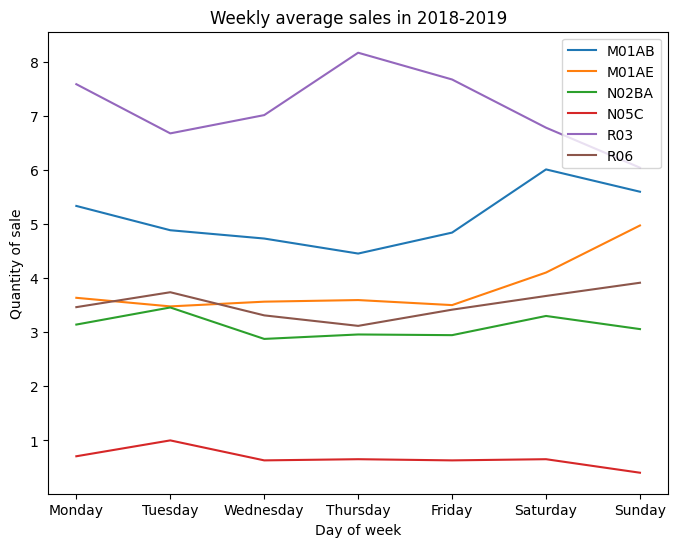

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

dfatcw = pd.read_csv('/Users/csuftitan/Desktop/Forecast/salesdaily.csv')
dfatcw['datum'] = pd.to_datetime(dfatcw['datum'])
weekday_name = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.rcParams.update({'font.size': 10})

days = pd.Series(weekday_name)

grp1 = dfatcw.loc[dfatcw['datum'] > '2018-01-01'].groupby(dfatcw['datum'].dt.day_name())['M01AB'].mean().reindex(days)
grp2 = dfatcw.loc[dfatcw['datum'] > '2018-01-01'].groupby(dfatcw['datum'].dt.day_name())['M01AE'].mean().reindex(days)
grp3 = dfatcw.loc[dfatcw['datum'] > '2018-01-01'].groupby(dfatcw['datum'].dt.day_name())['N02BA'].mean().reindex(days)
grp6 = dfatcw.loc[dfatcw['datum'] > '2018-01-01'].groupby(dfatcw['datum'].dt.day_name())['N05C'].mean().reindex(days)
grp7 = dfatcw.loc[dfatcw['datum'] > '2018-01-01'].groupby(dfatcw['datum'].dt.day_name())['R03'].mean().reindex(days)
grp8 = dfatcw.loc[dfatcw['datum'] > '2018-01-01'].groupby(dfatcw['datum'].dt.day_name())['R06'].mean().reindex(days)

grp1.plot(figsize=(8,6))
grp2.plot(figsize=(8,6))
grp3.plot(figsize=(8,6))
grp6.plot(figsize=(8,6))
grp7.plot(figsize=(8,6))
grp8.plot(figsize=(8,6))

plt.legend(['M01AB', 'M01AE', 'N02BA', 'N05C', 'R03', 'R06'], loc='upper right')
plt.title('Weekly average sales in 2018-2019')
plt.xlabel('Day of week')
plt.ylabel('Quantity of sale')

plt.show()


In [63]:
grp1 = dfatcw.loc[dfatcw['datum'] > '2018-01-01'].groupby(dfatcw['datum'].dt.day_name())['M01AB'].mean().reindex(days)
grp2 = dfatcw.loc[dfatcw['datum'] > '2018-01-01'].groupby(dfatcw['datum'].dt.day_name())['M01AE'].mean().reindex(days)
grp3 = dfatcw.loc[dfatcw['datum'] > '2018-01-01'].groupby(dfatcw['datum'].dt.day_name())['N02BA'].mean().reindex(days)
grp6 = dfatcw.loc[dfatcw['datum'] > '2018-01-01'].groupby(dfatcw['datum'].dt.day_name())['N05C'].mean().reindex(days)
grp7 = dfatcw.loc[dfatcw['datum'] > '2018-01-01'].groupby(dfatcw['datum'].dt.day_name())['R03'].mean().reindex(days)
grp8 = dfatcw.loc[dfatcw['datum'] > '2018-01-01'].groupby(dfatcw['datum'].dt.day_name())['R06'].mean().reindex(days)
# Print the weekly average sales for each medication
print("Weekly Average Sales:")
print("M01AB:", grp1)
print("M01AE:", grp2)
print("N02BA:", grp3)
print("N05C:", grp6)
print("R03:", grp7)
print("R06:", grp8)

Weekly Average Sales:
M01AB: datum
Monday       5.335652
Tuesday      4.886344
Wednesday    4.732826
Thursday     4.455109
Friday       4.842717
Saturday     6.011087
Sunday       5.598370
Name: M01AB, dtype: float64
M01AE: datum
Monday       3.636674
Tuesday      3.478032
Wednesday    3.565348
Thursday     3.595033
Friday       3.501902
Saturday     4.103967
Sunday       4.974413
Name: M01AE, dtype: float64
N02BA: datum
Monday       3.141848
Tuesday      3.458065
Wednesday    2.876630
Thursday     2.958696
Friday       2.946196
Saturday     3.301087
Sunday       3.058152
Name: N02BA, dtype: float64
N05C: datum
Monday       0.706522
Tuesday      1.000000
Wednesday    0.630435
Thursday     0.652174
Friday       0.630435
Saturday     0.652174
Sunday       0.402174
Name: N05C, dtype: float64
R03: datum
Monday       7.586957
Tuesday      6.677419
Wednesday    7.015399
Thursday     8.168931
Friday       7.673913
Saturday     6.782609
Sunday       6.043478
Name: R03, dtype: float64
R06: datu

In [18]:
resultsRolling={'M01AB':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'M01AE':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N02BA':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N02BE':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N05B':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N05C':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'R03':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'R06':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]}
resultsRollingdf = pd.DataFrame(resultsRolling)
resultsRollingdf.index = ['Naive MSE', 'Naive MAPE', 'Seasonal Naive MSE', 'Seasonal Naive MAPE',
                          'ARIMA MSE', 'ARIMA MAPE', 'AutoARIMA MSE', 'AutoARIMA MAPE',
                         'Prophet MSE', 'Prophet MAPE']
resultsLongterm={'M01AB':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'M01AE':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N02BA':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N02BE':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N05B':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N05C':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'R03':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'R06':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]}
resultsLongtermdf = pd.DataFrame(resultsLongterm)
resultsLongtermdf.index = ['Average MSE', 'Average MAPE', 'ARIMA MSE', 'ARIMA MAPE',
                           'AutoARIMA MSE', 'AutoARIMA MAPE', 'Prophet MSE', 'Prophet MAPE',
                          'Vanilla LSTM MSE', 'Vanilla LSTM MAPE', 'Stacked LSTM MSE', 'Stacked LSTM MAPE',
                          'Bidirectional LSTM MSE', 'Bidirectional LSTM MAPE']

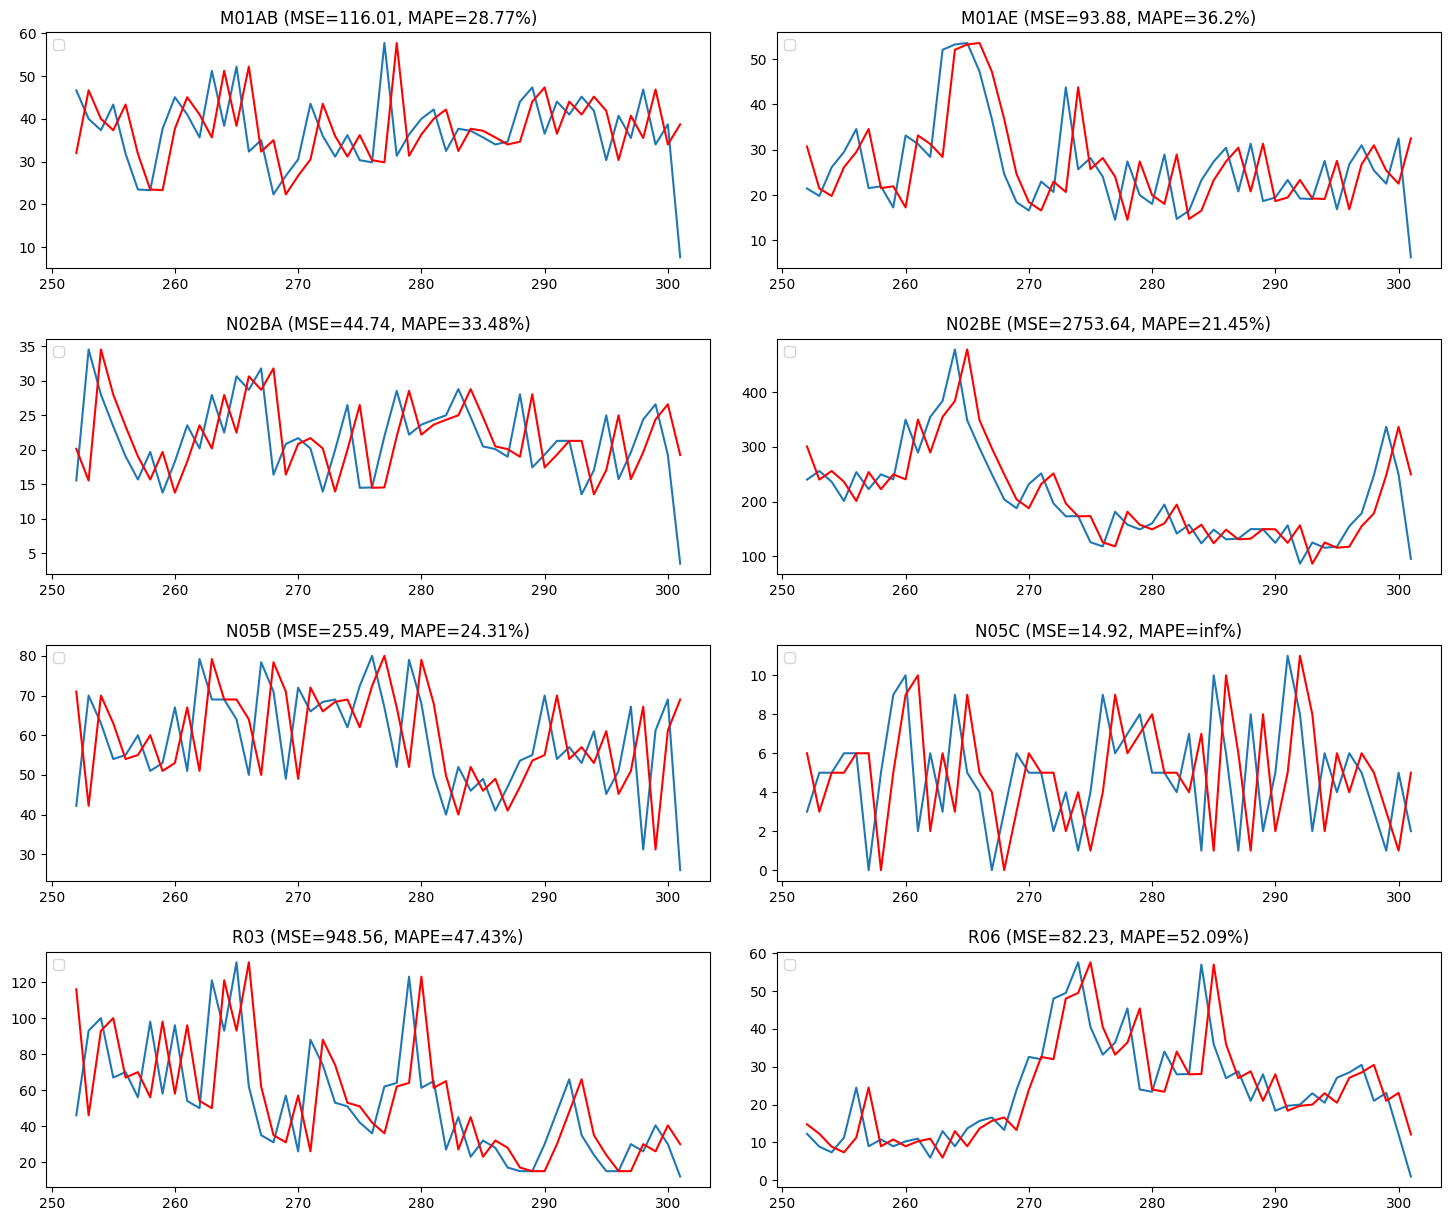

In [19]:
df=pd.read_csv('/Users/csuftitan/Desktop/Forecast/salesweekly.csv')
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
for x in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    ds=df[x]
    dataframe = concat([ds.shift(1), ds], axis=1)
    dataframe.columns = ['t+1', 't-1']
    size = len(dataframe)-50
    X=dataframe['t-1']
    Y=dataframe['t+1']
    test, predictions = X[size:len(X)], Y[size:len(Y)]
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsRollingdf.loc['Naive MSE',x]=error
    resultsRollingdf.loc['Naive MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

In [64]:
# Initialize results DataFrame
categories = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']
results_df = pd.DataFrame(index=['Naive MSE', 'Naive MAPE'], columns=categories)

# Loop through categories
for category in categories:
    ds = df[category]
    dataframe = pd.concat([ds.shift(1), ds], axis=1)
    dataframe.columns = ['t+1', 't-1']
    size = len(dataframe) - 50
    X = dataframe['t-1']
    Y = dataframe['t+1']
    test, predictions = X[size:len(X)], Y[size:len(Y)]
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    results_df.loc['Naive MSE', category] = error
    results_df.loc['Naive MAPE', category] = perror

print(results_df)

                 M01AB      M01AE      N02BA        N02BE       N05B   N05C  \
Naive MSE   116.014866  93.875126   44.74115  2753.643864   255.4856  14.92   
Naive MAPE   28.765667  36.202952  33.475848    21.451644  24.308687    inf   

                   R03        R06  
Naive MSE   948.560347    82.2287  
Naive MAPE   47.432638  52.094536  


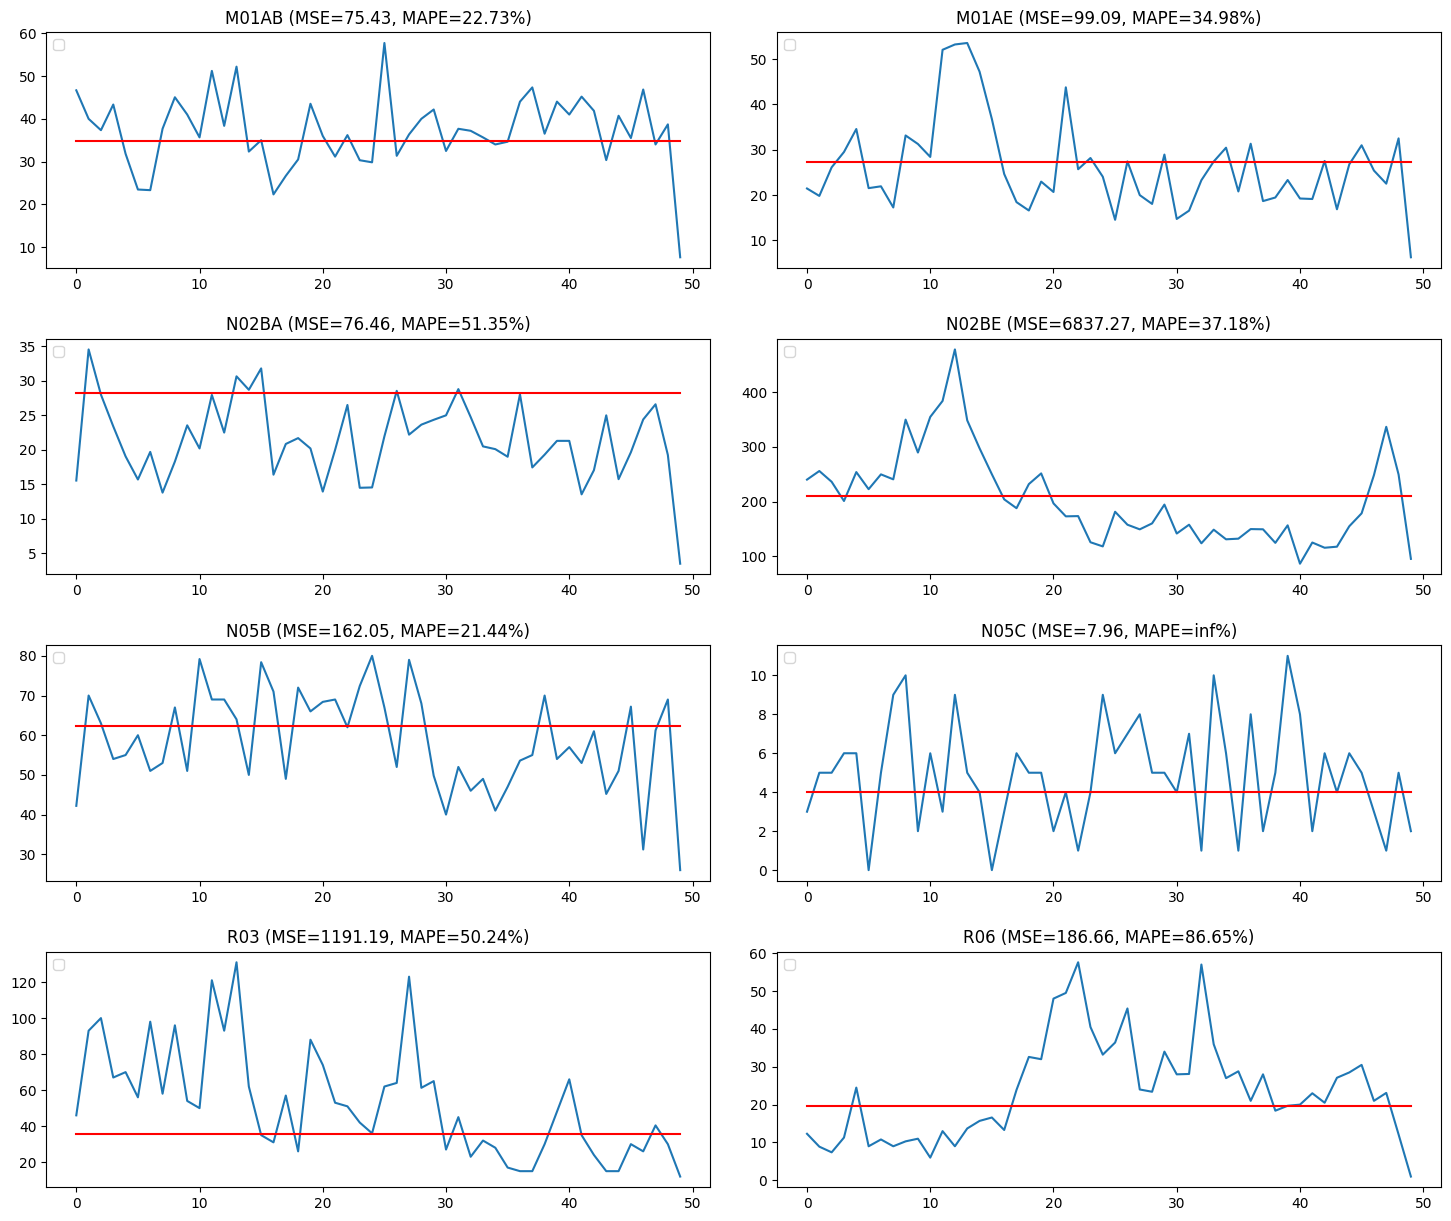

In [20]:
df=pd.read_csv('/Users/csuftitan/Desktop/Forecast/salesweekly.csv')
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
for x in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X=df[x].values
    size = len(X)-50
    test = X[size:len(X)]
    mean = np.mean(X[0:size])
    predictions = np.full(50,mean)
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsLongtermdf.loc['Average MSE',x]=error
    resultsLongtermdf.loc['Average MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

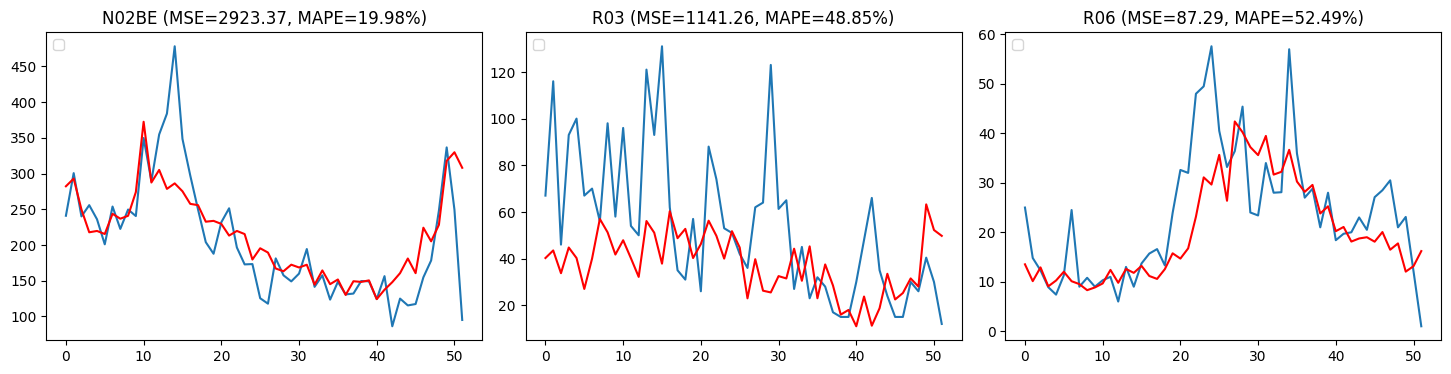

In [21]:
df=pd.read_csv('/Users/csuftitan/Desktop/Forecast/salesweekly.csv')
subplotindex=0
numrows=1
numcols=3
fig, ax = plt.subplots(numrows, numcols, figsize=(18,4))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
for x in ['N02BE','R03','R06']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X=df[x].values
    size = len(X)-52
    test = X[size:len(X)]
    train = X[0:size]
    predictions=list()
    history = [x for x in train]
    for i in range(len(test)):
        obs=list()
        for y in range(1,5):
            obs.append(train[-(y*52)+i])
        yhat = np.mean(obs)
        predictions.append(yhat)
        history.append(test[i])
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsRollingdf.loc['Seasonal Naive MSE',x]=error
    resultsRollingdf.loc['Seasonal Naive MAPE',x]=perror
    ax[colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[colindex].plot(test)
    ax[colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

In [22]:
import statsmodels.api as sm
df=pd.read_csv('/Users/csuftitan/Desktop/Forecast/salesweekly.csv')
warnings.filterwarnings("ignore")
for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
    resDiff = sm.tsa.arma_order_select_ic(df[x], max_ar=5, max_ma=5, ic='aic', trend='c')
    print('ARMA(p,q,'+x+') =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q,M01AB) = (3, 3) is the best.
ARMA(p,q,M01AE) = (2, 0) is the best.
ARMA(p,q,N02BA) = (3, 3) is the best.
ARMA(p,q,N02BE) = (2, 2) is the best.
ARMA(p,q,N05B) = (4, 3) is the best.
ARMA(p,q,N05C) = (3, 2) is the best.
ARMA(p,q,R03) = (1, 1) is the best.
ARMA(p,q,R06) = (2, 2) is the best.


In [23]:
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    error = mean_squared_error(test, predictions)
    return error

def evaluate_models(f, dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                except:
                    continue
    print(f+' - Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

p_values = range(0, 6)
d_values = range(0, 2)
q_values = range(0, 6)

warnings.filterwarnings("ignore")

df=pd.read_csv('//Users/csuftitan/Desktop/Forecast/salesweekly.csv')

for f in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    evaluate_models(f, df[f].values, p_values, d_values, q_values)

M01AB - Best ARIMANone MSE=inf
M01AE - Best ARIMANone MSE=inf
N02BA - Best ARIMANone MSE=inf
N02BE - Best ARIMANone MSE=inf
N05B - Best ARIMANone MSE=inf
N05C - Best ARIMANone MSE=inf
R03 - Best ARIMANone MSE=inf
R06 - Best ARIMANone MSE=inf


In [24]:
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) - 50)
    train, test = X[0:train_size], X[train_size:]
    model = ARIMA(train, order=arima_order)
    model_fit = model.fit()
    forecast = model_fit.predict(1,len(test))
    error = mean_squared_error(test, forecast)
    return error

def evaluate_models(f, dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                except:
                    continue
    print(f+' - Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

p_values = range(0, 6)
d_values = range(0, 2)
q_values = range(0, 6)

warnings.filterwarnings("ignore")

for f in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    evaluate_models(f, df[f].values, p_values, d_values, q_values)

M01AB - Best ARIMANone MSE=inf
M01AE - Best ARIMANone MSE=inf
N02BA - Best ARIMANone MSE=inf
N02BE - Best ARIMANone MSE=inf
N05B - Best ARIMANone MSE=inf
N05C - Best ARIMANone MSE=inf
R03 - Best ARIMANone MSE=inf
R06 - Best ARIMANone MSE=inf


In [25]:
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) - 50)
    train, test = X[0:train_size], X[train_size:]
    model = ARIMA(train, order=arima_order)
    model_fit = model.fit()
    forecast = model_fit.predict(1,len(test))
    error = mean_squared_error(test, forecast)
    return error

def evaluate_models(f, dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                except:
                    continue
    print(f+' - Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

p_values = range(0, 6)
d_values = range(0, 2)
q_values = range(0, 6)

warnings.filterwarnings("ignore")

for f in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    evaluate_models(f, df[f].values, p_values, d_values, q_values)

M01AB - Best ARIMANone MSE=inf
M01AE - Best ARIMANone MSE=inf
N02BA - Best ARIMANone MSE=inf
N02BE - Best ARIMANone MSE=inf
N05B - Best ARIMANone MSE=inf
N05C - Best ARIMANone MSE=inf
R03 - Best ARIMANone MSE=inf
R06 - Best ARIMANone MSE=inf


In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


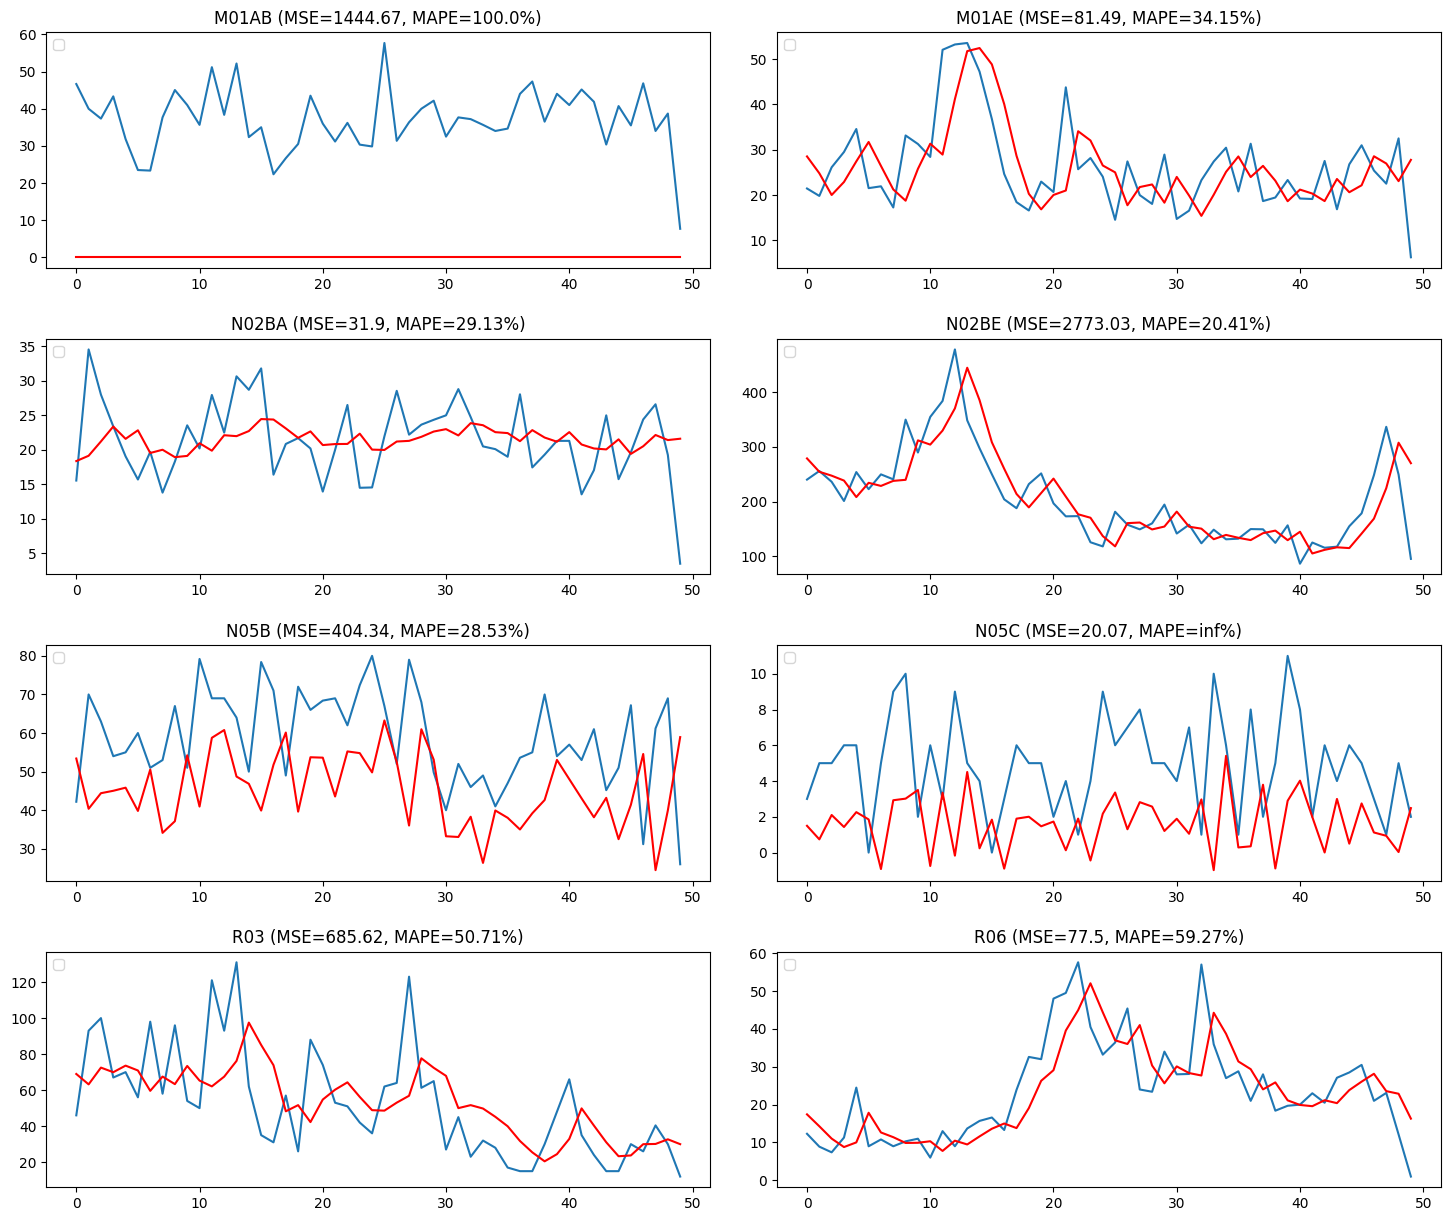

In [28]:

df = pd.read_csv('/Users/csuftitan/Desktop/Forecast/salesweekly.csv')

M01AB = {'series': 'M01AB', 'p': 0, 'd': 0, 'q': 0}
M01AE = {'series': 'M01AE', 'p': 2, 'd': 0, 'q': 0}
N02BA = {'series': 'N02BA', 'p': 5, 'd': 1, 'q': 1}
N02BE = {'series': 'N02BE', 'p': 2, 'd': 0, 'q': 0}
N05B = {'series': 'N05B', 'p': 0, 'd': 0, 'q': 5}
N05C = {'series': 'N05C', 'p': 0, 'd': 0, 'q': 1}
R03 = {'series': 'R03', 'p': 5, 'd': 1, 'q': 1}
R06 = {'series': 'R06', 'p': 1, 'd': 0, 'q': 1}

subplotindex = 0
numrows = 4
numcols = 2
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

for x in [M01AB, M01AE, N02BA, N02BE, N05B, N05C, R03, R06]:
    rowindex = math.floor(subplotindex / numcols)
    colindex = subplotindex - (rowindex * numcols)
    X = df[x['series']].values
    size = len(X) - 50
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = SARIMAX(history, order=(x['p'], x['d'], x['q']))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    ax[rowindex, colindex].set_title(x['series'] + ' (MSE=' + str(round(error, 2)) + ', MAPE=' + str(
        round(perror, 2)) + '%)')
    ax[rowindex, colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex, colindex].plot(test)
    ax[rowindex, colindex].plot(predictions, color='red')
    subplotindex += 1

plt.show()


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.99574D+00    |proj g|=  7.90479D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   7.905D-09   4.996D+00
  F =   4.9957435116363857     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.3

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  2.57508D+00    |proj g|=  1.74649D-03

At iterate   25    f=  2.57500D+00    |proj g|=  5.63951D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     35      1     0     0   1.183D-05   2.575D+00
  F =   2.5749998344698324     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.12843D+00    |proj g|=  5.86198D-09

           * * *

Tit   = total number of iterations
Tnf   = total nu

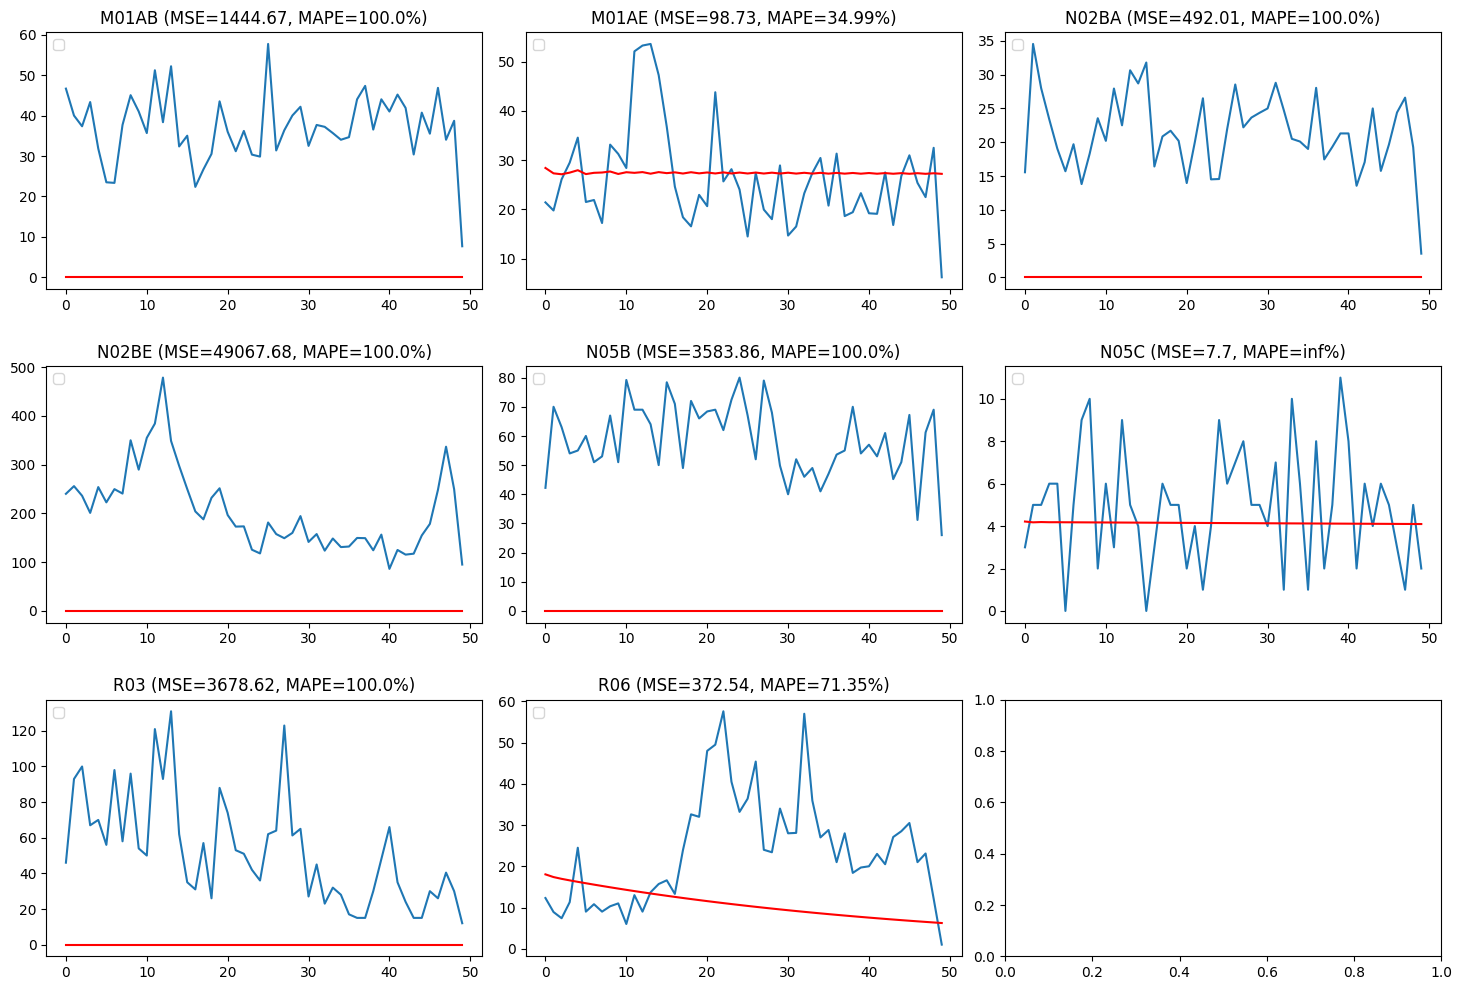

In [30]:


df = pd.read_csv('/Users/csuftitan/Desktop/Forecast/salesweekly.csv')

M01AB = {'series': 'M01AB', 'p': 0, 'd': 0, 'q': 0}
M01AE = {'series': 'M01AE', 'p': 4, 'd': 0, 'q': 4}
N02BA = {'series': 'N02BA', 'p': 0, 'd': 0, 'q': 0}
N02BE = {'series': 'N02BE', 'p': 0, 'd': 0, 'q': 0}
N05B = {'series': 'N05B', 'p': 0, 'd': 0, 'q': 0}
N05C = {'series': 'N05C', 'p': 2, 'd': 0, 'q': 2}
R03 = {'series': 'R03', 'p': 0, 'd': 0, 'q': 0}
R06 = {'series': 'R06', 'p': 2, 'd': 0, 'q': 2}

subplotindex = 0
numrows = 3
numcols = 3
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

for x in [M01AB, M01AE, N02BA, N02BE, N05B, N05C, R03, R06]:
    rowindex = math.floor(subplotindex / numcols)
    colindex = subplotindex - (rowindex * numcols)
    X = df[x['series']].values
    size = len(X) - 50
    train, test = X[0:size], X[size:len(X)]
    model = SARIMAX(train, order=(x['p'], x['d'], x['q']))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    error = mean_squared_error(test, forecast)
    perror = mean_absolute_percentage_error(test, forecast)
    resultsLongtermdf.loc['ARIMA MSE', x['series']] = error
    resultsLongtermdf.loc['ARIMA MAPE', x['series']] = perror
    ax[rowindex, colindex].set_title(x['series'] + ' (MSE=' + str(round(error, 2)) + ', MAPE=' + str(
        round(perror, 2)) + '%)')
    ax[rowindex, colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex, colindex].plot(test)
    ax[rowindex, colindex].plot(forecast, color='red')
    subplotindex += 1

plt.show()


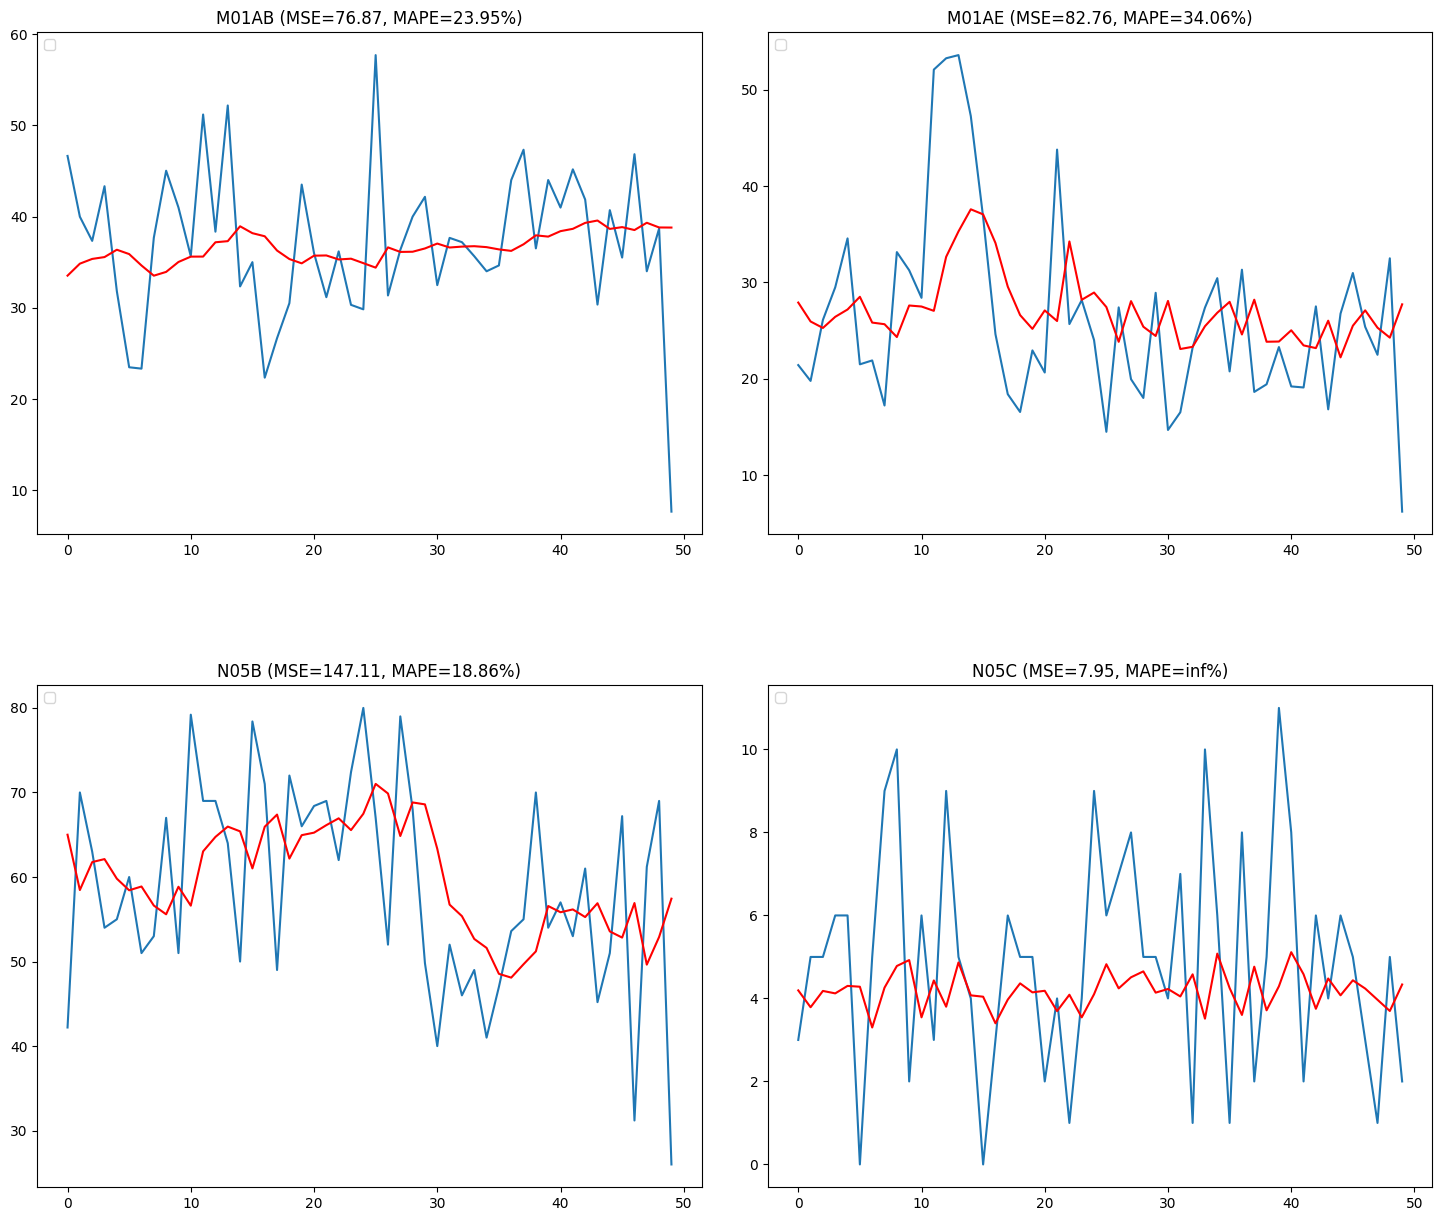

In [32]:
from pmdarima import auto_arima

df=pd.read_csv('/Users/csuftitan/Desktop/Forecast/salesweekly.csv')
subplotindex=0
numrows=2
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

for x in ['M01AB','M01AE','N05B','N05C']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X = df[x].values
    size = len(X)-50
    train, test = X[0:size], X[size:len(X)]
    history = [c for c in train]
    predictions = list()
    for t in range(len(test)):
      
        model = auto_arima(train, start_p=1, start_q=1,
                           max_p=5, max_q=5, max_d=1,
                           trace=False, seasonal=False,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
        model_fit = model.fit(history)
        output = model_fit.predict(n_periods=1)
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsRollingdf.loc['AutoARIMA MSE',x]=error
    resultsRollingdf.loc['AutoARIMA MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

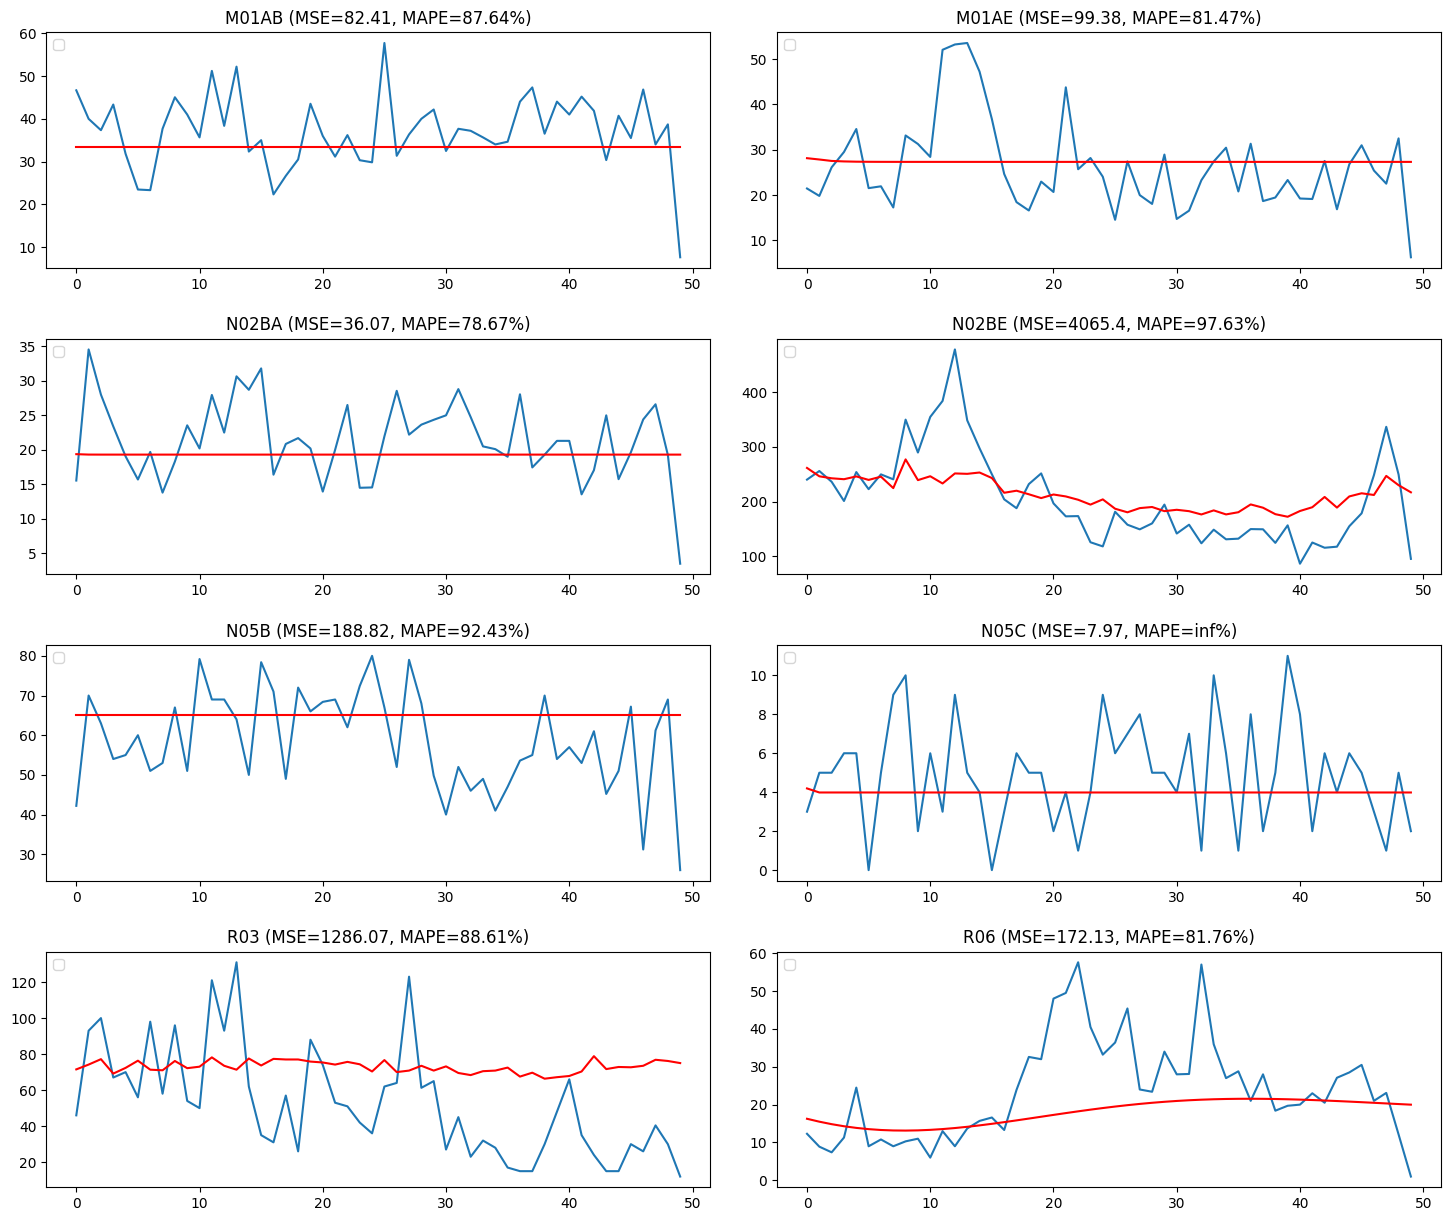

In [33]:

df=pd.read_csv('/Users/csuftitan/Desktop/Forecast/salesweekly.csv')
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

for x in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X = df[x].values
    size = int(len(X) - 50)
    train, test = X[0:size], X[size:len(X)]
    if (x=='N02BE' or x=='R03' or x=='R06'):
        model = auto_arima(X, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=52, max_d=1, max_D=1,
                           start_P=0, start_Q=0, max_P=5, max_Q=5, seasonal=True,
                           trace=False,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
    else:
        model = auto_arima(X, start_p=1, start_q=1,
                           max_p=5, max_q=5, max_d=1,
                           trace=False, seasonal=False,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
    model_fit = model.fit(train)
    forecast = model_fit.predict(n_periods=len(test))
    error = mean_squared_error(test, forecast)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsLongtermdf.loc['AutoARIMA MSE',x]=error
    resultsLongtermdf.loc['AutoARIMA MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(forecast, color='red')
    subplotindex=subplotindex+1
plt.show()

In [65]:
print(results_df)


                 M01AB      M01AE      N02BA        N02BE       N05B   N05C  \
Naive MSE   116.014866  93.875126   44.74115  2753.643864   255.4856  14.92   
Naive MAPE   28.765667  36.202952  33.475848    21.451644  24.308687    inf   

                   R03        R06  
Naive MSE   948.560347    82.2287  
Naive MAPE   47.432638  52.094536  


In [66]:
import pandas as pd

# Load daily sales data
daily_sales = pd.read_csv("/Users/csuftitan/Desktop/Forecast/salesdaily.csv")

# Load hourly sales data
hourly_sales = pd.read_csv("/Users/csuftitan/Desktop/Forecast/saleshourly.csv")

# Load weekly sales data
weekly_sales = pd.read_csv("/Users/csuftitan/Desktop/Forecast/salesweekly.csv")

# Load monthly sales data
monthly_sales = pd.read_csv("/Users/csuftitan/Desktop/Forecast/salesmonthly.csv")

# Display the first few rows of each dataset to ensure they are loaded correctly
print("Daily Sales Data:")
print(daily_sales.head())

print("\nHourly Sales Data:")
print(hourly_sales.head())

print("\nWeekly Sales Data:")
print(weekly_sales.head())

print("\nMonthly Sales Data:")
print(monthly_sales.head())


Daily Sales Data:
      datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0  1/2/2014    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1  1/3/2014    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2  1/4/2014    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3  1/5/2014    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4  1/6/2014    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name  
0   248     Thursday  
1   276       Friday  
2   276     Saturday  
3   276       Sunday  
4   276       Monday  

Hourly Sales Data:
            datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C  R03  R06  Year  \
0   1/2/2014 8:00    0.0   0.67    0.4    2.0   0.0   0.0  0.0  1.0  2014   
1   1/2/2014 9:00    0.0   0.00    1.0    0.0   2.0   0.0  0.0  0.0  2014   
2  1/2/2014 10:00    0.0   0.00    0.0    3.0   2.0   0.0  0.0  0.0  2014   
3  1/2/2014 11:00    0.0   0.00    0.0   

In [12]:
import pandas as pd

# Load daily sales data
daily_sales_df = pd.read_csv("/Users/csuftitan/Desktop/salesdaily.csv", parse_dates=["datum"])
# Load weekly sales data
weekly_sales_df = pd.read_csv("/Users/csuftitan/Desktop/salesweekly.csv", parse_dates=["datum"])
# Load monthly sales data
monthly_sales_df = pd.read_csv("/Users/csuftitan/Desktop/salesmonthly.csv", parse_dates=["datum"])

# Check the first few rows of each DataFrame
print("Daily Sales Data:")
print(daily_sales_df.head())
print("\nWeekly Sales Data:")
print(weekly_sales_df.head())
print("\nMonthly Sales Data:")
print(monthly_sales_df.head())


Daily Sales Data:
       datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0 2014-01-02    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1 2014-01-03    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2 2014-01-04    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3 2014-01-05    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4 2014-01-06    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name  
0   248     Thursday  
1   276       Friday  
2   276     Saturday  
3   276       Sunday  
4   276       Monday  

Weekly Sales Data:
       datum  M01AB  M01AE  N02BA   N02BE  N05B  N05C   R03   R06
0 2014-01-05  14.00  11.67   21.3  185.95  41.0   0.0  32.0   7.0
1 2014-01-12  29.33  12.68   37.9  190.70  88.0   5.0  21.0   7.2
2 2014-01-19  30.67  26.34   45.9  218.40  80.0   8.0  29.0  12.0
3 2014-01-26  34.00  32.37   31.5  179.60  80.0   8.0  23.0  10.0
4 2014-02-02 

In [16]:
import pandas as pd

# Load daily sales data
daily_sales_df = pd.read_csv("/Users/csuftitan/Desktop/salesdaily.csv")

# Load weekly sales data
weekly_sales_df = pd.read_csv("/Users/csuftitan/Desktop/salesweekly.csv")

# Load monthly sales data
monthly_sales_df = pd.read_csv("/Users/csuftitan/Desktop/salesmonthly.csv")

# Convert 'datum' column to datetime64[ns] in daily_sales_df
daily_sales_df['datum'] = pd.to_datetime(daily_sales_df['datum'])

# Convert 'datum' column to datetime64[ns] in weekly_sales_df
weekly_sales_df['datum'] = pd.to_datetime(weekly_sales_df['datum'])

# Convert 'datum' column to datetime64[ns] in monthly_sales_df
monthly_sales_df['datum'] = pd.to_datetime(monthly_sales_df['datum'])

# Merge monthly, weekly, and daily sales data
merged_sales_df = pd.merge(monthly_sales_df, weekly_sales_df, on='datum', how='left')
merged_sales_df = pd.merge(merged_sales_df, daily_sales_df, on='datum', how='left')

# Check the merged DataFrame
print("Merged Sales Data:")
print(merged_sales_df.head())


Merged Sales Data:
       datum  M01AB_x  M01AE_x  N02BA_x   N02BE_x  N05B_x  N05C_x  R03_x  \
0 2014-01-31   127.69   99.090  152.100   878.030   354.0    50.0  112.0   
1 2014-02-28   133.32  126.050  177.000  1001.900   347.0    31.0  122.0   
2 2014-03-31   137.44   92.950  147.655   779.275   232.0    20.0  112.0   
3 2014-04-30   113.10   89.475  130.900   698.500   209.0    18.0   97.0   
4 2014-05-31   101.79  119.933  132.100   628.780   270.0    23.0  107.0   

   R06_x  M01AB_y  ...  N02BA  N02BE  N05B  N05C   R03  R06    Year  Month  \
0   48.2      NaN  ...    7.1   26.9   9.0   0.0   1.0  0.0  2014.0    1.0   
1   36.2      NaN  ...    5.3   37.0  12.0   1.0   2.0  0.0  2014.0    2.0   
2   85.4      NaN  ...    4.0   15.4   6.0   1.0   4.0  6.0  2014.0    3.0   
3   73.7      NaN  ...    7.0   43.1  11.0   0.0   7.0  4.0  2014.0    4.0   
4  123.7      NaN  ...    2.0   28.0  10.0   0.0  15.0  2.0  2014.0    5.0   

    Hour  Weekday Name  
0  276.0        Friday  
1  27

In [17]:
# Fill missing values with zeros
merged_sales_df.fillna(0, inplace=True)

# Drop redundant columns
merged_sales_df.drop(columns=['Year', 'Month', 'Hour', 'Weekday Name'], inplace=True)

# Rename columns for clarity
merged_sales_df.rename(columns={
    'M01AB_x': 'Monthly_M01AB',
    'M01AE_x': 'Monthly_M01AE',
    'N02BA_x': 'Monthly_N02BA',
    'N02BE_x': 'Monthly_N02BE',
    'N05B_x': 'Monthly_N05B',
    'N05C_x': 'Monthly_N05C',
    'R03_x': 'Monthly_R03',
    'R06_x': 'Monthly_R06',
    'M01AB_y': 'Weekly_M01AB',
    'M01AE_y': 'Weekly_M01AE',
    'N02BA_y': 'Weekly_N02BA',
    'N02BE_y': 'Weekly_N02BE',
    'N05B_y': 'Weekly_N05B',
    'N05C_y': 'Weekly_N05C',
    'R03_y': 'Weekly_R03',
    'R06_y': 'Weekly_R06',
    'M01AB': 'Daily_M01AB',
    'M01AE': 'Daily_M01AE',
    'N02BA': 'Daily_N02BA',
    'N02BE': 'Daily_N02BE',
    'N05B': 'Daily_N05B',
    'N05C': 'Daily_N05C',
    'R03': 'Daily_R03',
    'R06': 'Daily_R06'
}, inplace=True)

# Check the cleaned merged DataFrame
print("Cleaned Merged Sales Data:")
print(merged_sales_df.head())


Cleaned Merged Sales Data:
       datum  Monthly_M01AB  Monthly_M01AE  Monthly_N02BA  Monthly_N02BE  \
0 2014-01-31         127.69         99.090        152.100        878.030   
1 2014-02-28         133.32        126.050        177.000       1001.900   
2 2014-03-31         137.44         92.950        147.655        779.275   
3 2014-04-30         113.10         89.475        130.900        698.500   
4 2014-05-31         101.79        119.933        132.100        628.780   

   Monthly_N05B  Monthly_N05C  Monthly_R03  Monthly_R06  Weekly_M01AB  ...  \
0         354.0          50.0        112.0         48.2           0.0  ...   
1         347.0          31.0        122.0         36.2           0.0  ...   
2         232.0          20.0        112.0         85.4           0.0  ...   
3         209.0          18.0         97.0         73.7           0.0  ...   
4         270.0          23.0        107.0        123.7           0.0  ...   

   Weekly_R03  Weekly_R06  Daily_M01AB  Daily_M

In [18]:
import pandas as pd

# Step 1: Load the salesdaily.csv file
sales_daily_df = pd.read_csv("/Users/csuftitan/Desktop/salesdaily.csv")

# Display the first few rows of the DataFrame
print("First few rows of the salesdaily.csv data:")
print(sales_daily_df.head())


First few rows of the salesdaily.csv data:
      datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0  1/2/2014    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1  1/3/2014    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2  1/4/2014    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3  1/5/2014    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4  1/6/2014    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name  
0   248     Thursday  
1   276       Friday  
2   276     Saturday  
3   276       Sunday  
4   276       Monday  


In [19]:
# Step 2: Load the salesweekly.csv file
sales_weekly_df = pd.read_csv("/Users/csuftitan/Desktop/salesweekly.csv")

# Display the first few rows of the DataFrame
print("\nFirst few rows of the salesweekly.csv data:")
print(sales_weekly_df.head())



First few rows of the salesweekly.csv data:
       datum  M01AB  M01AE  N02BA   N02BE  N05B  N05C   R03   R06
0   1/5/2014  14.00  11.67   21.3  185.95  41.0   0.0  32.0   7.0
1  1/12/2014  29.33  12.68   37.9  190.70  88.0   5.0  21.0   7.2
2  1/19/2014  30.67  26.34   45.9  218.40  80.0   8.0  29.0  12.0
3  1/26/2014  34.00  32.37   31.5  179.60  80.0   8.0  23.0  10.0
4   2/2/2014  31.02  23.35   20.7  159.88  84.0  12.0  29.0  12.0


In [20]:
# Step 3: Load the salesmonthly.csv file
sales_monthly_df = pd.read_csv("/Users/csuftitan/Desktop/salesmonthly.csv")

# Display the first few rows of the DataFrame
print("\nFirst few rows of the salesmonthly.csv data:")
print(sales_monthly_df.head())


First few rows of the salesmonthly.csv data:
        datum   M01AB    M01AE    N02BA     N02BE   N05B  N05C    R03    R06
0  2014-01-31  127.69   99.090  152.100   878.030  354.0  50.0  112.0   48.2
1  2014-02-28  133.32  126.050  177.000  1001.900  347.0  31.0  122.0   36.2
2  2014-03-31  137.44   92.950  147.655   779.275  232.0  20.0  112.0   85.4
3  2014-04-30  113.10   89.475  130.900   698.500  209.0  18.0   97.0   73.7
4  2014-05-31  101.79  119.933  132.100   628.780  270.0  23.0  107.0  123.7


In [22]:
import pandas as pd

# Step 1: Load the CSV files
daily_sales_df = pd.read_csv("/Users/csuftitan/Desktop/salesdaily.csv")
weekly_sales_df = pd.read_csv("/Users/csuftitan/Desktop/salesweekly.csv")
monthly_sales_df = pd.read_csv("/Users/csuftitan/Desktop/salesmonthly.csv")

# Step 2: Display the first few rows of each dataset
print("First few rows of the salesdaily.csv data:")
print(daily_sales_df.head())
print("\nFirst few rows of the salesweekly.csv data:")
print(weekly_sales_df.head())
print("\nFirst few rows of the salesmonthly.csv data:")
print(monthly_sales_df.head())

# Step 3: Prepare the data for each medicine

# List of medicines
medicines = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

# Dictionary to store cleaned data for each medicine
cleaned_data = {}

# Iterate over each medicine
for medicine in medicines:
    # Prepare daily sales data
    daily_data = daily_sales_df[['datum', medicine]].copy()
    daily_data['datum'] = pd.to_datetime(daily_data['datum'])
    daily_data.set_index('datum', inplace=True)
    daily_data.fillna(0, inplace=True)
    
    # Prepare weekly sales data
    weekly_data = weekly_sales_df[['datum', medicine]].copy()
    weekly_data['datum'] = pd.to_datetime(weekly_data['datum'])
    weekly_data.set_index('datum', inplace=True)
    weekly_data.fillna(0, inplace=True)
    
    # Prepare monthly sales data
    monthly_data = monthly_sales_df[['datum', medicine]].copy()
    monthly_data['datum'] = pd.to_datetime(monthly_data['datum'])
    monthly_data.set_index('datum', inplace=True)
    monthly_data.fillna(0, inplace=True)
    
    # Combine daily, weekly, and monthly data
    combined_data = daily_data.resample('D').sum()
    combined_data['Weekly'] = weekly_data[medicine]
    combined_data['Monthly'] = monthly_data[medicine]
    
    cleaned_data[medicine] = combined_data

# Display the first few rows of the cleaned data for M01AB
print("\nCombined Sales Data for M01AB:")
print(cleaned_data['M01AB'].head())

# You can access cleaned data for other medicines similarly, for example:
print("\nCombined Sales Data for M01AE:")
print(cleaned_data['M01AE'].head())
print("\nCombined Sales Data for N02BA:")
print(cleaned_data['N02BA'].head())


First few rows of the salesdaily.csv data:
      datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0  1/2/2014    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1  1/3/2014    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2  1/4/2014    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3  1/5/2014    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4  1/6/2014    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name  
0   248     Thursday  
1   276       Friday  
2   276     Saturday  
3   276       Sunday  
4   276       Monday  

First few rows of the salesweekly.csv data:
       datum  M01AB  M01AE  N02BA   N02BE  N05B  N05C   R03   R06
0   1/5/2014  14.00  11.67   21.3  185.95  41.0   0.0  32.0   7.0
1  1/12/2014  29.33  12.68   37.9  190.70  88.0   5.0  21.0   7.2
2  1/19/2014  30.67  26.34   45.9  218.40  80.0   8.0  29.0  12.0
3  1/26/2014  34.00  32.37   31.5  

In [28]:
import pandas as pd

# Load the sales data for all medicines
sales_daily_df = pd.read_csv("/Users/csuftitan/Desktop/salesdaily.csv")
sales_weekly_df = pd.read_csv("/Users/csuftitan/Desktop/salesweekly.csv")
sales_monthly_df = pd.read_csv("/Users/csuftitan/Desktop/salesmonthly.csv")

# Convert the 'datum' column to datetime object
sales_daily_df['datum'] = pd.to_datetime(sales_daily_df['datum'])
sales_weekly_df['datum'] = pd.to_datetime(sales_weekly_df['datum'])
sales_monthly_df['datum'] = pd.to_datetime(sales_monthly_df['datum'])

# Set the 'datum' column as the index
sales_daily_df.set_index('datum', inplace=True)
sales_weekly_df.set_index('datum', inplace=True)
sales_monthly_df.set_index('datum', inplace=True)

# Handle any missing values if present by filling them with zeros
sales_daily_df.fillna(0, inplace=True)
sales_weekly_df.fillna(0, inplace=True)
sales_monthly_df.fillna(0, inplace=True)

# Organize the data into a time series format
# Combine the daily, weekly, and monthly sales data for each medicine
combined_sales_data = {}
medicines = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

for medicine in medicines:
    # Combine daily, weekly, and monthly sales data
    combined_df = pd.concat([sales_daily_df[medicine], 
                             sales_weekly_df[medicine], 
                             sales_monthly_df[medicine]], axis=1)
    # Fill missing values with zeros
    combined_df.fillna(0, inplace=True)
    # Rename columns
    combined_df.columns = ['Daily', 'Weekly', 'Monthly']
    # Add to combined_sales_data dictionary
    combined_sales_data[medicine] = combined_df

# Example of combined sales data for M01AB
print("Combined Sales Data for M01AB:")
print(combined_sales_data['M01AB'].head())


Combined Sales Data for M01AB:
            Daily  Weekly  Monthly
datum                             
2014-01-02    0.0     0.0      0.0
2014-01-03    8.0     0.0      0.0
2014-01-04    2.0     0.0      0.0
2014-01-05    4.0    14.0      0.0
2014-01-06    5.0     0.0      0.0


In [102]:
import pandas as pd

# Load the sales data for all medicines
sales_daily_df = pd.read_csv("/Users/csuftitan/Desktop/salesdaily.csv")
sales_weekly_df = pd.read_csv("/Users/csuftitan/Desktop/salesweekly.csv")
sales_monthly_df = pd.read_csv("/Users/csuftitan/Desktop/salesmonthly.csv")

# Convert the 'datum' column to datetime object
sales_daily_df['datum'] = pd.to_datetime(sales_daily_df['datum'])
sales_weekly_df['datum'] = pd.to_datetime(sales_weekly_df['datum'])
sales_monthly_df['datum'] = pd.to_datetime(sales_monthly_df['datum'])

# Set the 'datum' column as the index
sales_daily_df.set_index('datum', inplace=True)
sales_weekly_df.set_index('datum', inplace=True)
sales_monthly_df.set_index('datum', inplace=True)

# Handle any missing values if present by filling them with zeros
sales_daily_df.fillna(0, inplace=True)
sales_weekly_df.fillna(0, inplace=True)
sales_monthly_df.fillna(0, inplace=True)

# Set frequency for the index
sales_weekly_df.index.freq = 'W'
sales_monthly_df.index.freq = 'ME'

# Organize the data into a time series format
# Combine the daily, weekly, and monthly sales data for each medicine
combined_sales_data = {}
medicines = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

for medicine in medicines:
    # Combine daily, weekly, and monthly sales data
    combined_df = pd.concat([sales_daily_df[medicine], 
                             sales_weekly_df[medicine], 
                             sales_monthly_df[medicine]], axis=1)
    # Fill missing values with zeros
    combined_df.fillna(0, inplace=True)
    # Rename columns
    combined_df.columns = ['Daily', 'Weekly', 'Monthly']
    # Add to combined_sales_data dictionary
    combined_sales_data[medicine] = combined_df

# Example of combined sales data for M01AB
print("Combined Sales Data for M01AB:")
print(combined_sales_data['M01AB'].head())


Combined Sales Data for M01AB:
            Daily  Weekly  Monthly
datum                             
2014-01-02    0.0     0.0      0.0
2014-01-03    8.0     0.0      0.0
2014-01-04    2.0     0.0      0.0
2014-01-05    4.0    14.0      0.0
2014-01-06    5.0     0.0      0.0


In [105]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the combined sales data for each medicine
combined_sales_data = {
    'M01AB': pd.read_csv("/Users/csuftitan/Desktop/salesdaily.csv", index_col='datum')['M01AB'],
    'M01AE': pd.read_csv("/Users/csuftitan/Desktop/salesdaily.csv", index_col='datum')['M01AE'],
    'N02BA': pd.read_csv("/Users/csuftitan/Desktop/salesdaily.csv", index_col='datum')['N02BA'],
    'N02BE': pd.read_csv("/Users/csuftitan/Desktop/salesdaily.csv", index_col='datum')['N02BE'],
    'N05B': pd.read_csv("/Users/csuftitan/Desktop/salesdaily.csv", index_col='datum')['N05B'],
    'N05C': pd.read_csv("/Users/csuftitan/Desktop/salesdaily.csv", index_col='datum')['N05C'],
    'R03': pd.read_csv("/Users/csuftitan/Desktop/salesdaily.csv", index_col='datum')['R03'],
    'R06': pd.read_csv("/Users/csuftitan/Desktop/salesdaily.csv", index_col='datum')['R06']
}

# Train the models and make predictions
predictions = {}

for medicine, data in combined_sales_data.items():
    # Fit ARIMA model
    model = ARIMA(data, order=(3, 0, 3))
    model_fit = model.fit()

    # Make predictions
    forecast = model_fit.forecast(steps=30)  # Forecast for the next 30 days
    predictions[medicine] = forecast

    # Evaluate model
    mse = mean_squared_error(data[-30:], forecast)
    print(f"Mean Squared Error for {medicine}: {mse}")

# Save predictions to CSV files
for medicine, forecast in predictions.items():
    forecast_df = pd.DataFrame({'Date': pd.date_range(start=data.index[-1], periods=30),
                                'Predicted_Sales': forecast})
    forecast_df.to_csv(f"{medicine}_predictions.csv", index=False)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

Mean Squared Error for M01AB: 7.167775374522649


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error for M01AE: 4.326683528610875
Mean Squared Error for N02BA: 2.6569459184932454


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

Mean Squared Error for N02BE: 201.58467166748673


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error for N05B: 20.195649484930573
Mean Squared Error for N05C: 1.0573747395871098


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Fra

Mean Squared Error for R03: 37.411101507737726
Mean Squared Error for R06: 4.67542830070379


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [108]:
# Train the models and make predictions
predictions = {}

for medicine, data in combined_sales_data.items():
    # Fit ARIMA model
    model = ARIMA(data, order=(3, 0, 3))
    model_fit = model.fit()

    # Make predictions
    forecast = model_fit.forecast(steps=365)  # Forecast for the next 365 days (1 year)
    predictions[medicine] = forecast

    # Evaluate model
    mse = mean_squared_error(data[-365:], forecast)
    print(f"Mean Squared Error for {medicine}: {mse}")

# Save predictions to CSV files
for medicine, forecast in predictions.items():
    forecast_df = pd.DataFrame({'Date': pd.date_range(start=data.index[-1], periods=365),
                                'Predicted_Sales': forecast})
    forecast_df.to_csv(f"{medicine}_predictions.csv", index=False)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

Mean Squared Error for M01AB: 8.158224203073043


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error for M01AE: 5.298810378810687
Mean Squared Error for N02BA: 4.050407602718235


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

Mean Squared Error for N02BE: 247.40101258762982


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error for N05B: 19.00482065927726
Mean Squared Error for N05C: 1.2749808028149745


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Fra

Mean Squared Error for R03: 76.85221269172978
Mean Squared Error for R06: 7.0062698967206805


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
